# ASSIGNMENT 1
---

## Dhelya Apriliani Putri

## PYTN-KS019-013

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [16]:
london_crime = pd.read_csv('london_crime_by_lsoa.csv')
london_crime

lsoa_code               borough               major_category  \
0        E01001116               Croydon                     Burglary   
1        E01001646             Greenwich  Violence Against the Person   
2        E01000677               Bromley  Violence Against the Person   
3        E01003774             Redbridge                     Burglary   
4        E01004563            Wandsworth                      Robbery   
...            ...                   ...                          ...   
1048570  E01001649             Greenwich           Theft and Handling   
1048571  E01000464                Bexley              Criminal Damage   
1048572  E01000064  Barking and Dagenham                        Drugs   
1048573  E01004615            Wandsworth              Criminal Damage   
1048574  E01001752               Hackney    Other Notifiable Offences   

                      minor_category  value  year  month  
0        Burglary in Other Buildings      0  2016     11  
1                     Other violence      0  2016     11  
2                     Other violence      0  2015      5  
3        Burglary in Other Buildings      0  2016      3  
4                  Personal Property      0  2008      6  
...                              ...    ...   ...    ...  
1048570                  Other Theft      3  2010     11  
1048571  Criminal Damage To Dwelling      0  2012      3  
1048572          Possession Of Drugs      1  2010      2  
1048573        Other Criminal Damage      1  2016      7  
1048574             Other Notifiable      0  2008     12  

[1048575 rows x 7 columns]

In [17]:
london_crime.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [18]:
london_crime.tail()

lsoa_code               borough             major_category  \
1048570  E01001649             Greenwich         Theft and Handling   
1048571  E01000464                Bexley            Criminal Damage   
1048572  E01000064  Barking and Dagenham                      Drugs   
1048573  E01004615            Wandsworth            Criminal Damage   
1048574  E01001752               Hackney  Other Notifiable Offences   

                      minor_category  value  year  month  
1048570                  Other Theft      3  2010     11  
1048571  Criminal Damage To Dwelling      0  2012      3  
1048572          Possession Of Drugs      1  2010      2  
1048573        Other Criminal Damage      1  2016      7  
1048574             Other Notifiable      0  2008     12

In [19]:
london_crime.sort_values(by = "year")

lsoa_code                 borough               major_category  \
1048574  E01001752                 Hackney    Other Notifiable Offences   
1006415  E01004693             Westminster    Other Notifiable Offences   
382528   E01000696                 Bromley              Criminal Damage   
382539   E01001013                 Croydon           Theft and Handling   
382540   E01002893  Kensington and Chelsea  Violence Against the Person   
...            ...                     ...                          ...   
630434   E01000736                 Bromley                      Robbery   
630437   E01001103                 Croydon                     Burglary   
630443   E01000555                   Brent                        Drugs   
630344   E01002053                Haringey    Other Notifiable Offences   
524287   E01003008    Kingston upon Thames  Violence Against the Person   

                      minor_category  value  year  month  
1048574             Other Notifiable      0  2008     12  
1006415             Other Notifiable      0  2008      2  
382528   Criminal Damage To Dwelling      0  2008     11  
382539   Theft/Taking of Pedal Cycle      0  2008     11  
382540           Assault with Injury      1  2008      8  
...                              ...    ...   ...    ...  
630434             Personal Property      0  2016     12  
630437        Burglary in a Dwelling      0  2016      4  
630443           Possession Of Drugs      1  2016     10  
630344              Other Notifiable      0  2016     11  
524287                    Harassment      0  2016      6  

[1048575 rows x 7 columns]

In [20]:
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   lsoa_code       1048575 non-null  object
 1   borough         1048575 non-null  object
 2   major_category  1048575 non-null  object
 3   minor_category  1048575 non-null  object
 4   value           1048575 non-null  int64 
 5   year            1048575 non-null  int64 
 6   month           1048575 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 56.0+ MB


In [21]:
london_crime.major_category.value_counts()

major_category
Theft and Handling             307992
Violence Against the Person    247061
Criminal Damage                159997
Drugs                           92169
Burglary                        81064
Robbery                         72852
Other Notifiable Offences       60400
Fraud or Forgery                18521
Sexual Offences                  8519
Name: count, dtype: int64

In [22]:
london_crime.minor_category.value_counts()

minor_category
Harassment                                40721
Other Theft                               40709
Possession Of Drugs                       40709
Assault with Injury                       40705
Personal Property                         40661
Common Assault                            40654
Burglary in a Dwelling                    40640
Other Theft Person                        40584
Theft/Taking Of Motor Vehicle             40541
Other Notifiable                          40437
Burglary in Other Buildings               40424
Theft From Motor Vehicle                  40366
Criminal Damage To Motor Vehicle          40345
Wounding/GBH                              40327
Motor Vehicle Interference & Tampering    40283
Other Criminal Damage                     40260
Criminal Damage To Dwelling               40201
Theft/Taking of Pedal Cycle               40137
Other violence                            39762
Criminal Damage To Other Building         39191
Drug Trafficking         

In [23]:
london_crime.shape

(1048575, 7)

# Data Cleaning

In [28]:
# Mengidentifikasi jumlah nilai yang hilang (missing values) 
london_crime_mv = pd.DataFrame(london_crime.isna().sum()).reset_index()
london_crime_mv.columns = ['Features','Missing Values']
london_crime_mv

Features  Missing Values
0       lsoa_code               0
1         borough               0
2  major_category               0
3  minor_category               0
4           value               0
5            year               0
6           month               0

In [29]:
london_crime.duplicated().sum()

0

In [30]:
# Cek nilai yang unique pada dataset

lc_nunique = london_crime.nunique()
lc_nunique = lc_nunique.to_frame(name='Jumlah')
lc_nunique.reset_index(inplace=True)
lc_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
lc_nunique

Kolom  Jumlah
0       lsoa_code    4835
1         borough      33
2  major_category       9
3  minor_category      32
4           value     113
5            year       9
6           month      12

In [31]:
#Mengelompok data sesuai kelompoknya
category = ['lsoa_code', 'borough', 'major_category', 'minor_category']
numerical = ['value', 'year', 'month']

In [34]:
london_crime['lsoa_code'] = london_crime['lsoa_code'].astype('category')
london_crime['borough'] = london_crime['borough'].astype('category')
london_crime['major_category'] = london_crime['major_category'].astype('category')
london_crime['minor_category'] = london_crime['minor_category'].astype('category')
london_crime.dtypes

lsoa_code         category
borough           category
major_category    category
minor_category    category
value                int64
year                 int64
month                int64
dtype: object

In [35]:
#Check kelompok numerik
lc_num = london_crime.select_dtypes(include = ['int64'])
lc_num.head()

value  year  month
0      0  2016     11
1      0  2016     11
2      0  2015      5
3      0  2016      3
4      0  2008      6

In [36]:
#Check kelompok category
lc_cat = london_crime.select_dtypes(include = ['category'])
lc_cat.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  
0  Burglary in Other Buildings  
1               Other violence  
2               Other violence  
3  Burglary in Other Buildings  
4            Personal Property

In [37]:
london_crime.describe(exclude = 'O').transpose()

count unique                 top    freq         mean  \
lsoa_code         1048575   4835           E01000360     289          NaN   
borough           1048575     33             Croydon   46642          NaN   
major_category    1048575      9  Theft and Handling  307992          NaN   
minor_category    1048575     32          Harassment   40721          NaN   
value           1048575.0    NaN                 NaN     NaN     0.475333   
year            1048575.0    NaN                 NaN     NaN  2011.995726   
month           1048575.0    NaN                 NaN     NaN     6.500728   

                     std     min     25%     50%     75%     max  
lsoa_code            NaN     NaN     NaN     NaN     NaN     NaN  
borough              NaN     NaN     NaN     NaN     NaN     NaN  
major_category       NaN     NaN     NaN     NaN     NaN     NaN  
minor_category       NaN     NaN     NaN     NaN     NaN     NaN  
value           1.678109     0.0     0.0     0.0     1.0   241.0  
year            2.580506  2008.0  2010.0  2012.0  2014.0  2016.0  
month           3.450317     1.0     3.0     7.0     9.0    12.0

# DATA VISUALIZATION

# **AREA PLOT**
---

In [38]:
top5_crime = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
top5_crime = top5_crime.set_index("year").groupby("borough").sum()
top5_crime = top5_crime.sort_values(by="value", ascending=False).head(5)
top5_crime

value
borough           
Westminster  34072
Lambeth      22504
Southwark    21696
Camden       20829
Newham       20591

Westminster adalah wilayah metropolitan di London dengan angka kejahatan/kriminal tertinggi.

In [39]:
df_top5 = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_top5 = df_top5.loc[top5_crime.index]
df_top5 = pd.pivot_table(df_top5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_top5

borough  Barking and Dagenham  Barnet  Bexley  Brent  Bromley  Camden  \
year                                                                    
2008                        0       0       0      0        0    2454   
2009                        0       0       0      0        0    2388   
2010                        0       0       0      0        0    2376   
2011                        0       0       0      0        0    2520   
2012                        0       0       0      0        0    2435   
2013                        0       0       0      0        0    2146   
2014                        0       0       0      0        0    2182   
2015                        0       0       0      0        0    2088   
2016                        0       0       0      0        0    2240   

borough  City of London  Croydon  Ealing  Enfield  ...  Merton  Newham  \
year                                               ...                   
2008                  0        0       0        0  ...       0    2297   
2009                  0        0       0        0  ...       0    2183   
2010                  0        0       0        0  ...       0    2484   
2011                  0        0       0        0  ...       0    2163   
2012                  0        0       0        0  ...       0    2334   
2013                  0        0       0        0  ...       0    2262   
2014                  0        0       0        0  ...       0    2059   
2015                  0        0       0        0  ...       0    2212   
2016                  0        0       0        0  ...       0    2597   

borough  Redbridge  Richmond upon Thames  Southwark  Sutton  Tower Hamlets  \
year                                                                         
2008             0                     0       2700       0              0   
2009             0                     0       2320       0              0   
2010             0                     0       2414       0              0   
2011             0                     0       2431       0              0   
2012             0                     0       2373       0              0   
2013             0                     0       2571       0              0   
2014             0                     0       2040       0              0   
2015             0                     0       2378       0              0   
2016             0                     0       2469       0              0   

borough  Waltham Forest  Wandsworth  Westminster  
year                                              
2008                  0           0         3040  
2009                  0           0         3172  
2010                  0           0         2706  
2011                  0           0         3908  
2012                  0           0         5613  
2013                  0           0         4322  
2014                  0           0         3679  
2015                  0           0         3900  
2016                  0           0         3732  

[9 rows x 33 columns]

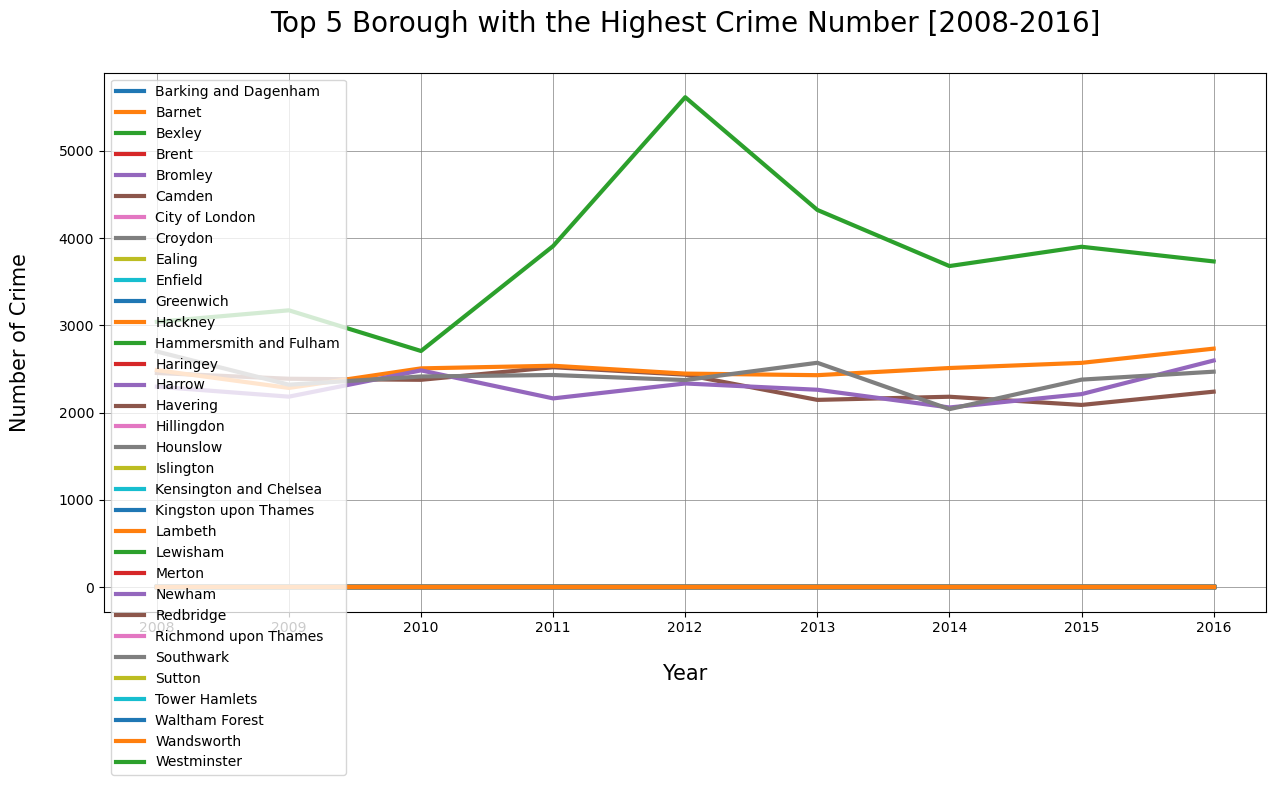

In [40]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top5.plot(kind="line",
             figsize=(15,7),
            linewidth=3)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

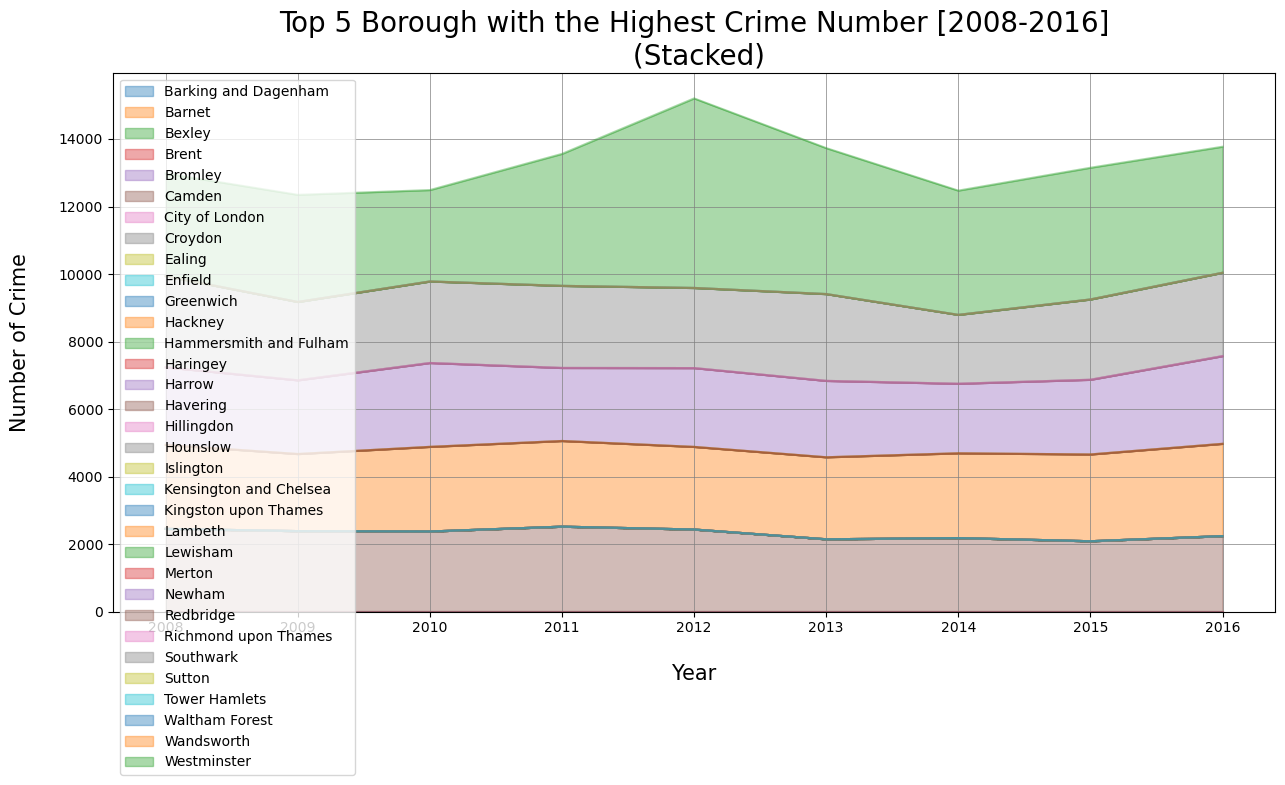

In [41]:
#STACKED AREA PLOT
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=True,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n (Stacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

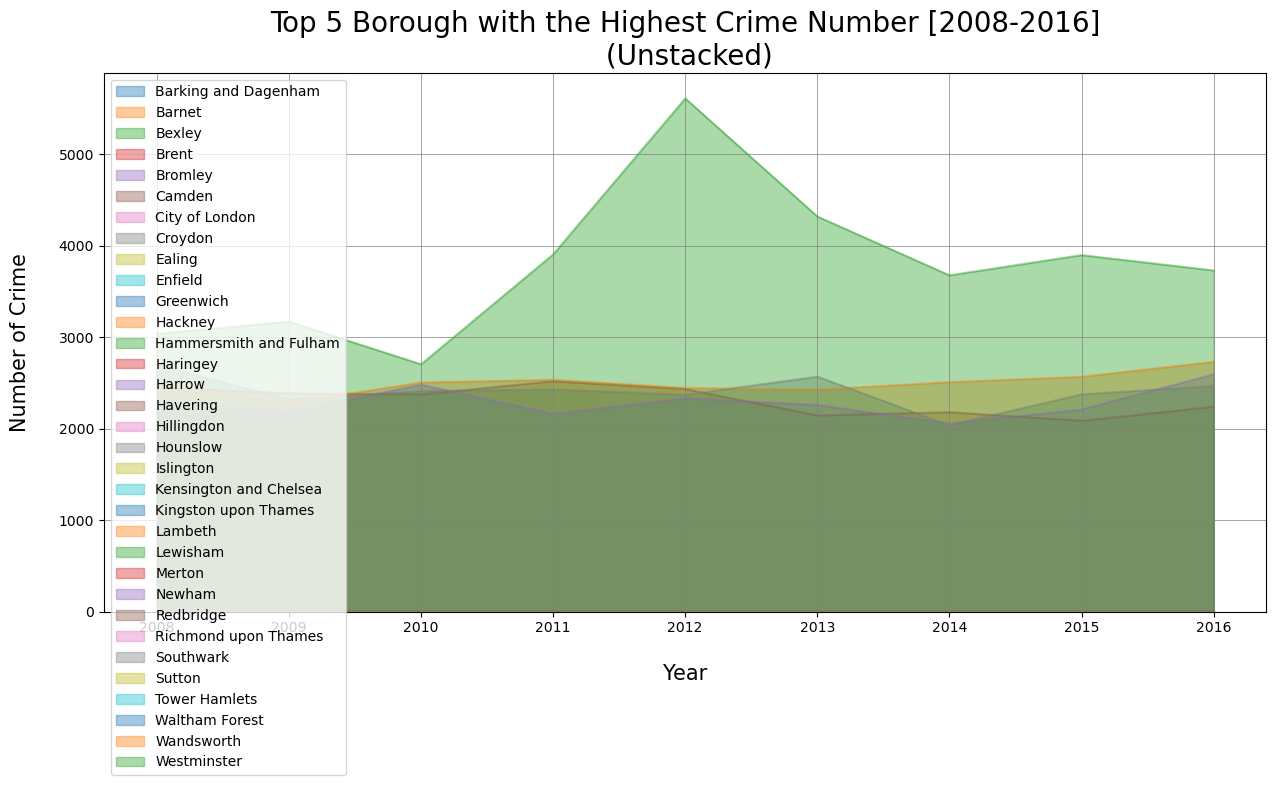

In [42]:
#UNSTACKED AREA PLOT
df_top5.plot(kind="area",
             figsize=(15,7),
             stacked=False,
             alpha = 0.4)
plt.title("Top 5 Borough with the Highest Crime Number [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot di atas, dapat diketahui bahwa Westminster memiliki angka kejahatan/kriminal tertinggi dari tahun 2008-2016, diikuti dengan Lambeth, Southwark, Camden, dan Newham. Dapat dilihat juga bahwa Westminster memiliki angka kejahatan/kriminal yang sangat tinggi apabila dibandingkan dengan 4 _borough_ lain yang merupakan wilayah dengan angka kejahatan/kriminal yang tertinggi juga dan mencapai jumlah tertinggi di tahun 2012 diikuti penurunan di tahun 2013 dan tidak mengalami kenaikan dan penurunan yang signifikan sampai dengan tahun 2016. 

# Wilayah London yang memiliki angka kejahatan/kriminal yang paling rendah tahun 2008-2016

In [43]:
least5_crime = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
least5_crime = least5_crime.set_index("year").groupby("borough").sum()
least5_crime = least5_crime.sort_values(by="value", ascending=True).head(5)
least5_crime

value
borough                    
City of London           64
Kingston upon Thames   6700
Richmond upon Thames   7283
Sutton                 7907
Merton                 8636

Berdasarkan _output_ berikut, diketahui bahwa City of London adalah wilayah metropolitan yang memiliki angka kejahatan/kriminal terendah yaitu sebesar 64 dari tahun 2008-2016.

Berikut adalah tabel yang menunjukkan 5 wilayah metropolitan/_borough_ dengan angka kejahatan/kriminal terendah dari tahun 2008-2016:

In [44]:
df_least5 = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("borough")
df_least5 = df_least5.loc[least5_crime.index]
df_least5 = pd.pivot_table(df_least5, values="value", aggfunc=np.sum, index="year", columns="borough")
df_least5

borough  Barking and Dagenham  Barnet  Bexley  Brent  Bromley  Camden  \
year                                                                    
2008                        0       0       0      0        0       0   
2009                        0       0       0      0        0       0   
2010                        0       0       0      0        0       0   
2011                        0       0       0      0        0       0   
2012                        0       0       0      0        0       0   
2013                        0       0       0      0        0       0   
2014                        0       0       0      0        0       0   
2015                        0       0       0      0        0       0   
2016                        0       0       0      0        0       0   

borough  City of London  Croydon  Ealing  Enfield  ...  Merton  Newham  \
year                                               ...                   
2008                  0        0       0        0  ...    1009       0   
2009                  0        0       0        0  ...    1023       0   
2010                  0        0       0        0  ...     970       0   
2011                  1        0       0        0  ...    1051       0   
2012                 20        0       0        0  ...     979       0   
2013                 10        0       0        0  ...     872       0   
2014                 11        0       0        0  ...     831       0   
2015                 13        0       0        0  ...     866       0   
2016                  9        0       0        0  ...    1035       0   

borough  Redbridge  Richmond upon Thames  Southwark  Sutton  Tower Hamlets  \
year                                                                         
2008             0                   795          0     908              0   
2009             0                   746          0     973              0   
2010             0                   797          0     950              0   
2011             0                   761          0     878              0   
2012             0                   925          0     865              0   
2013             0                   859          0     966              0   
2014             0                   737          0     770              0   
2015             0                   865          0     755              0   
2016             0                   798          0     842              0   

borough  Waltham Forest  Wandsworth  Westminster  
year                                              
2008                  0           0            0  
2009                  0           0            0  
2010                  0           0            0  
2011                  0           0            0  
2012                  0           0            0  
2013                  0           0            0  
2014                  0           0            0  
2015                  0           0            0  
2016                  0           0            0  

[9 rows x 33 columns]

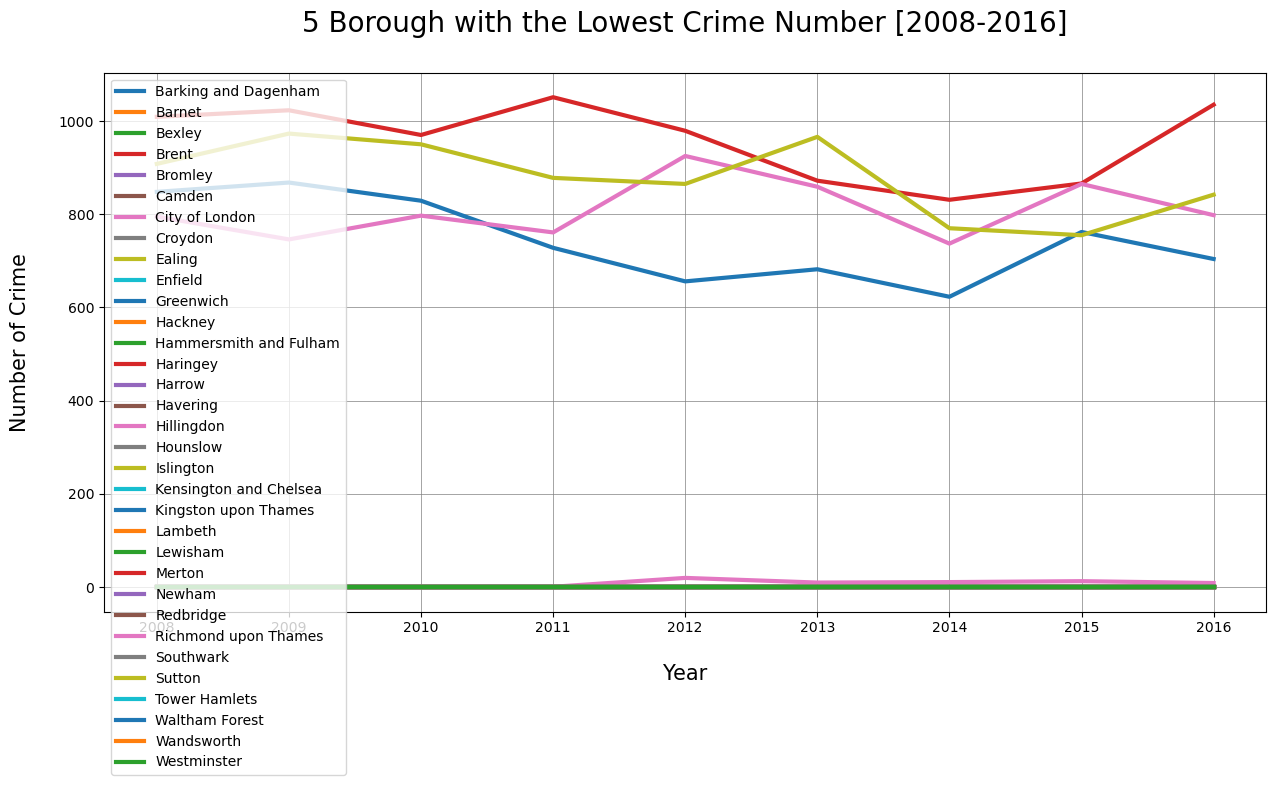

In [45]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_least5.plot(kind="line",
             figsize=(15,7),
            linewidth=3)
plt.title("5 Borough with the Lowest Crime Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

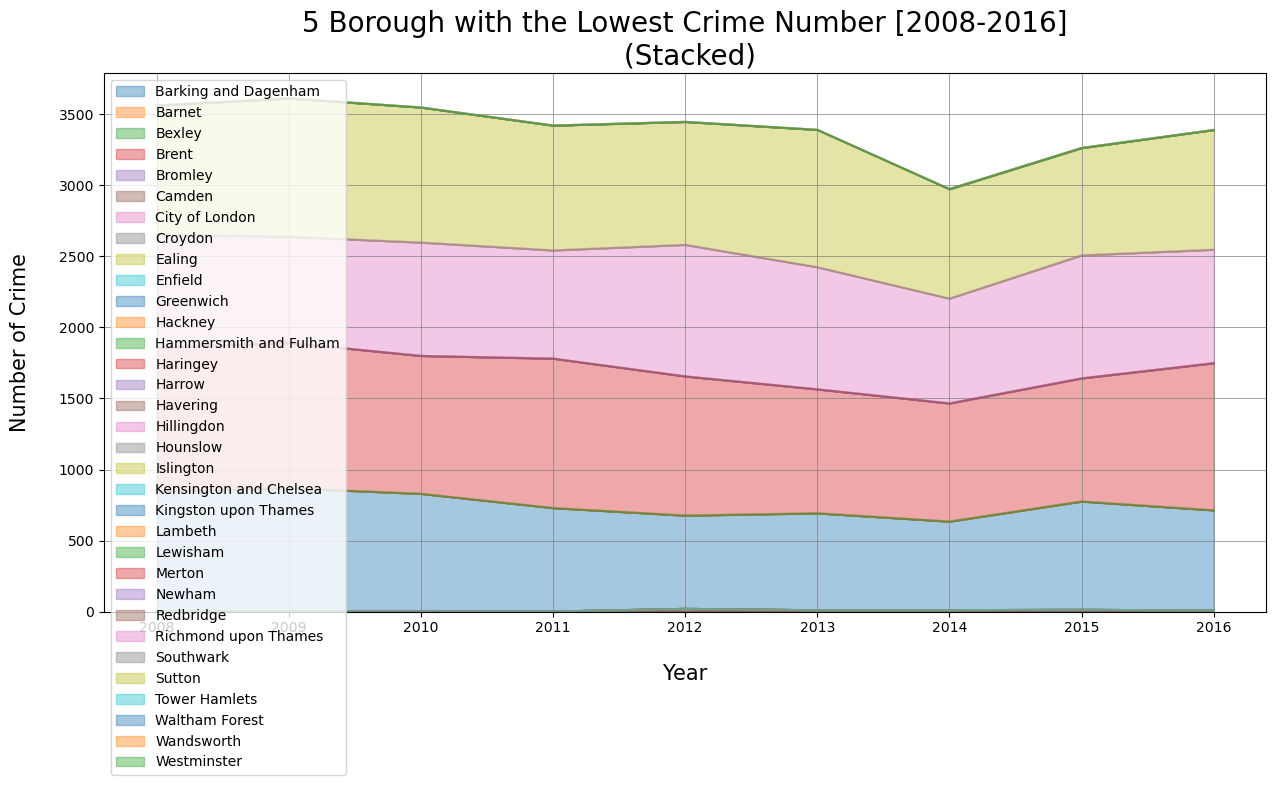

In [46]:
#STACKED AREA PLOT
df_least5.plot(kind="area",
             figsize=(15,7),
             stacked=True,
             alpha = 0.4)
plt.title("5 Borough with the Lowest Crime Number [2008-2016]\n (Stacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

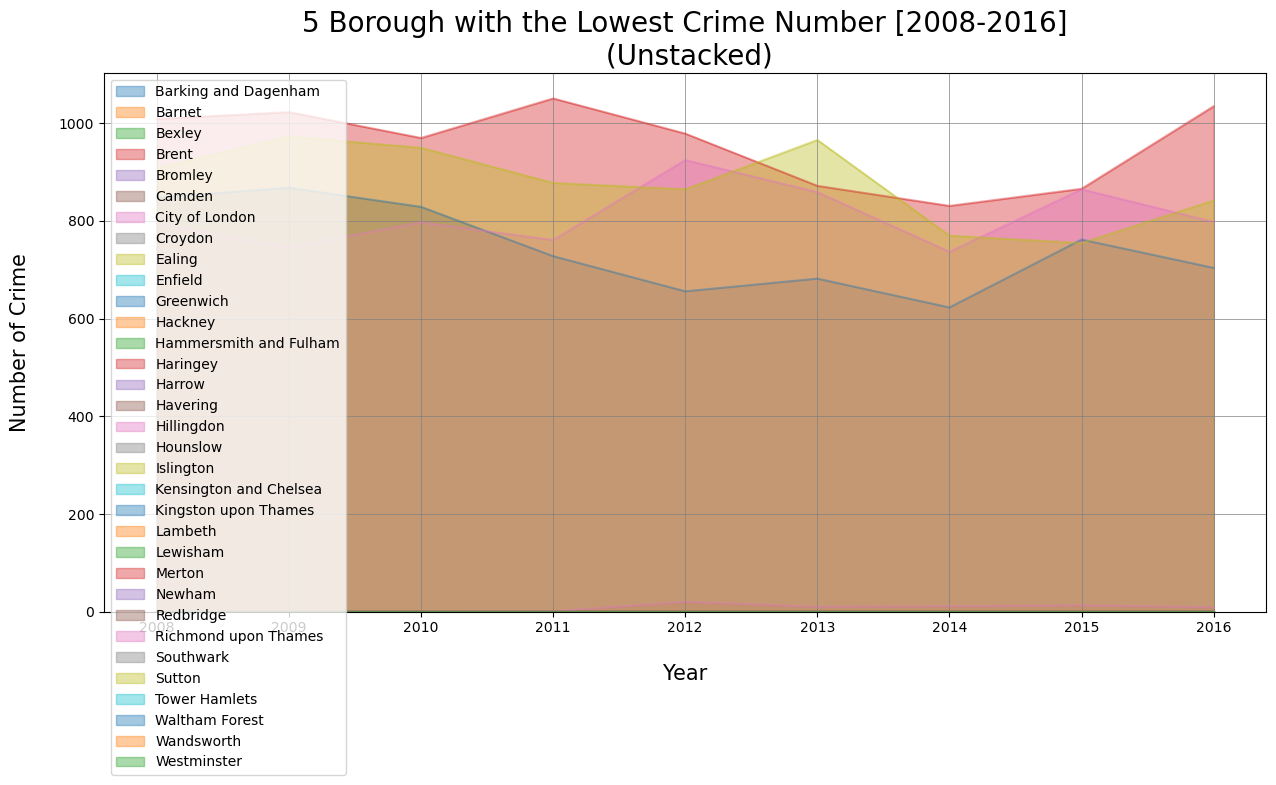

In [47]:
#UNSTACKED AREA PLOT
df_least5.plot(kind="area",
             figsize=(15,7),
             stacked=False,
             alpha = 0.4)
plt.title("5 Borough with the Lowest Crime Number [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot di atas, diketahui bahwa City of London adalah wilayah metropolitan/borough yang memiliki angka kejahatan/kriminal yang paling rendah di tahun 2008-2016 dan diikuti dengan Bexley, Kingston upon Thames, Richmon upon Thames, dan Sutton. Selain itu, dapat diketahui juga bahwa City of London memiliki angka kejahatan/kriminal yang sangat rendah apabila dibandingkan dengan 4 borough lain yang memiliki angka kejahatan/kriminal yang terendah juga. Pada tahun 2008-2010 tidak ada kejahatan/kriminal apapun di City of London, kemudian angka kejahatan/kriminal mulai naik di tahun 2011 dan mencapai angka kejahatan/kriminal tertinggi di tahun 2016

# Kategori kejahatan dengan jumlah tertinggi selama tahun 2008 -2016

In [48]:
top5_major = london_crime.drop(["lsoa_code","borough","minor_category","month"], axis=1)
top5_major.set_index("year", inplace=True)
top5_major = top5_major.groupby("major_category").sum()
top5_major = top5_major.sort_values(by="value", ascending=False).head(5)
top5_major

value
major_category                     
Theft and Handling           204713
Violence Against the Person  121635
Burglary                      58754
Criminal Damage               48162
Drugs                         35881

Berdasarkan output tabel di atas, diketahui bahwa jumlah tertinggi kategori kejahatan/kriminal selama tahun 2008-2016 adalah Theft and Handling atau pencurian.

In [49]:
# Tabel 5 kategori dengan jumlah kejahatan/kriminal tertinggi dari tahun 2008-2016
df_top5major = london_crime.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
df_top5major = df_top5major.loc[top5_major.index]
df_top5major = pd.pivot_table(df_top5major, values="value", aggfunc=np.sum, index="year", columns="major_category")
df_top5major

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year                                                                 
2008                6892             7096   5143                 0   
2009                6929             6441   4468                 0   
2010                6794             5944   4422                 0   
2011                7392             5489   4515                 0   
2012                7147             4646   3843                 0   
2013                6912             4331   3894                 0   
2014                6006             4426   3425                 0   
2015                5475             4813   2997                 0   
2016                5207             4976   3174                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year                                                                  
2008                                    0        0                0   
2009                                    0        0                0   
2010                                    0        0                0   
2011                                    0        0                0   
2012                                    0        0                0   
2013                                    0        0                0   
2014                                    0        0                0   
2015                                    0        0                0   
2016                                    0        0                0   

major_category  Theft and Handling  Violence Against the Person  
year                                                             
2008                         21773                        12216  
2009                         21349                        12492  
2010                         21968                        12040  
2011                         23566                        11139  
2012                         26681                        11953  
2013                         23870                        11535  
2014                         20567                        14360  
2015                         22060                        17688  
2016                         22879                        18212

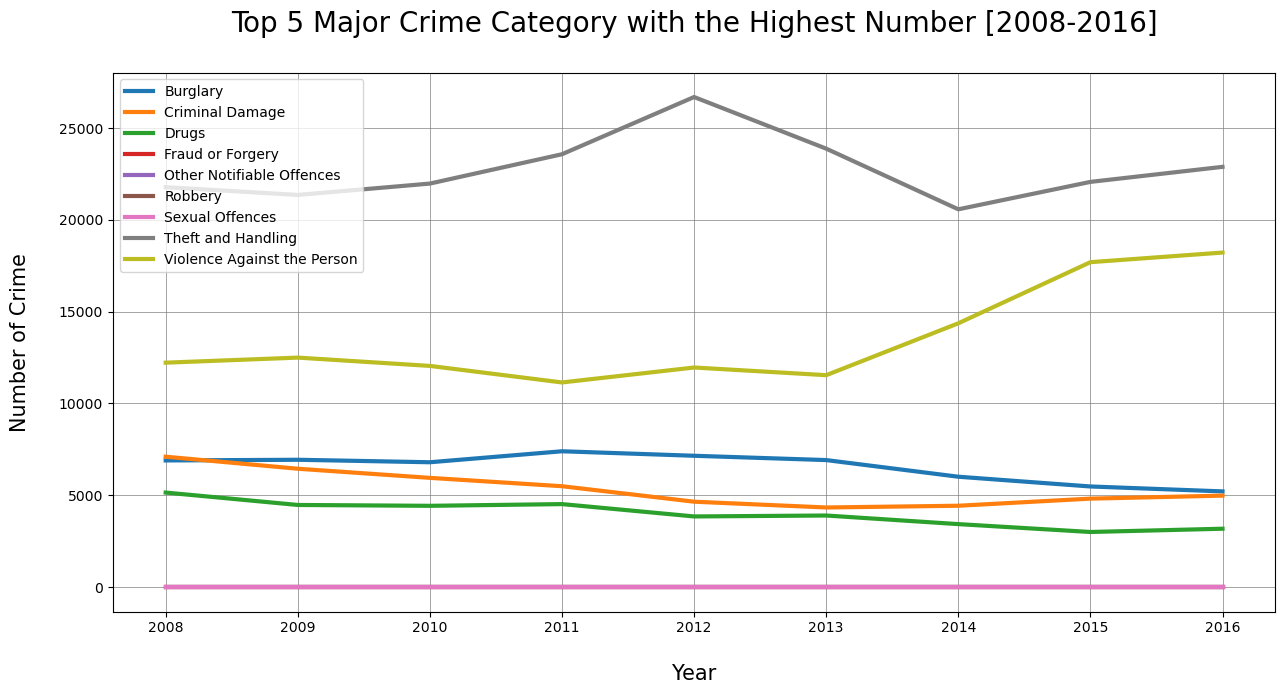

In [50]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top5major.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("Top 5 Major Crime Category with the Highest Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

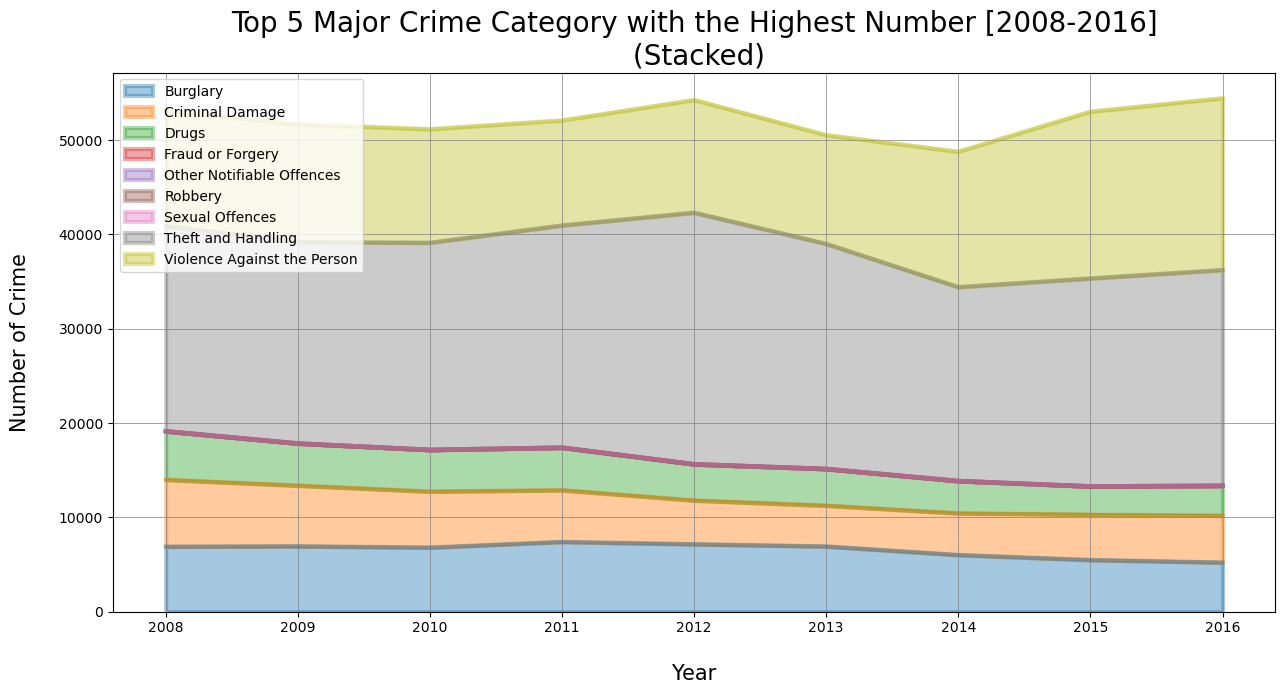

In [51]:
#STACKED AREA PLOT
df_top5major.plot(kind="area", 
                  figsize=(15,7),
                  stacked=True,
                  alpha=0.4,
                 linewidth=3)
plt.title("Top 5 Major Crime Category with the Highest Number [2008-2016]\n (Stacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

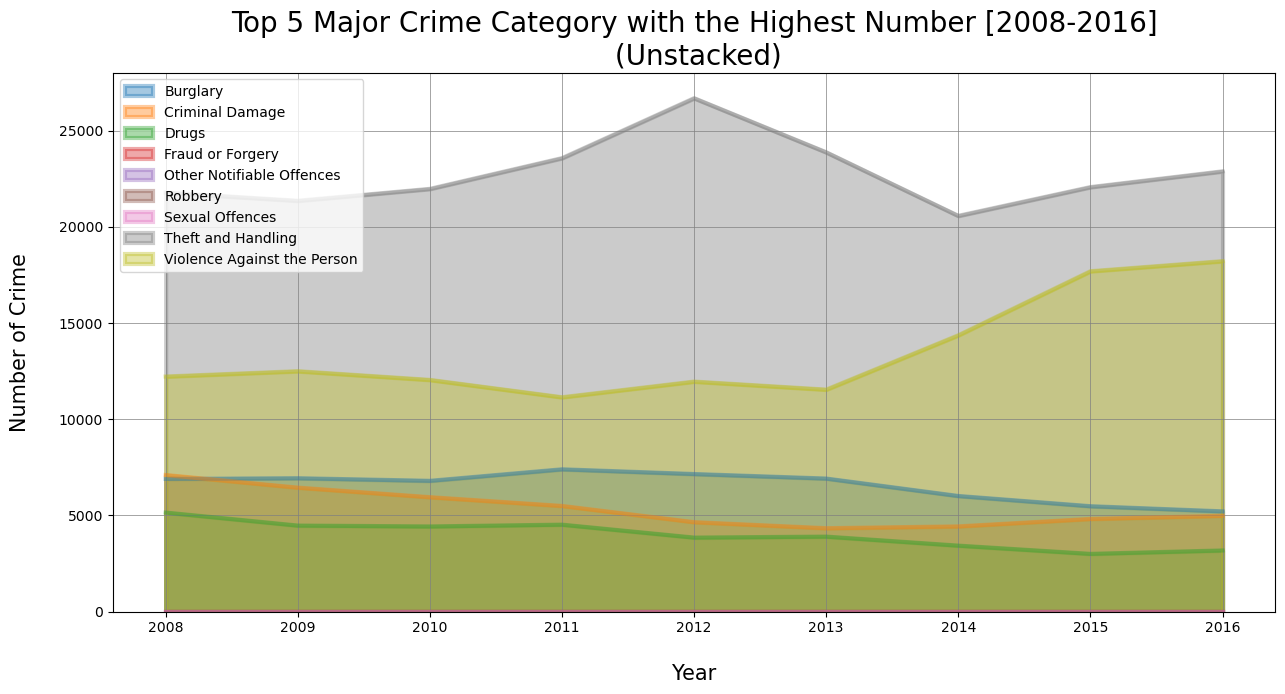

In [52]:
#UNSTACKED AREA PLOT
df_top5major.plot(kind="area", 
                  figsize=(15,7),
                  stacked=False,
                  alpha=0.4,
                 linewidth=3)
plt.title("Top 5 Major Crime Category with the Highest Number [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot di atas, kita dapat mengetahui bahwa secara grafis, kategori Theft and Handling adalah kategori kejahatan yang memiliki jumlah tertinggi dari tahun 2008-2016 dan diikuti dengan Violance Against the Person, Burglary, Criminal Damage, dan Drugs. Dapat diketahui juga bahwa Theft and Handling memiliki jumlah yang cukup besar apabila dibandingkan dengan 4 kategori kejahatan lainnya dan mencapai jumlah tertinggi di tahun 2012, diikuti dengan penurunan di tahun 2013, serta tidak mengalami kenaikan atau penurunan yang signifikan sampai dengan tahun 2016.

 # Kategori kejahatan yang memiliki jumlah terendah selama tahun 2008-2016

In [53]:
least3_major = london_crime.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("year")
least3_major = least3_major.groupby("major_category").sum()
least3_major = least3_major.sort_values(by="value", ascending=True).head(3)
least3_major

value
major_category                  
Sexual Offences               85
Fraud or Forgery             489
Other Notifiable Offences   8272

Berdasarkan output tabel di atas, diketahui bahwa jumlah terendah kategori kejahatan/kriminal selama tahun 2008-2016 adalah Sexual Offences atau pelecehan seksual.

In [54]:
# Tabel 3 kategori dengan jumlah kejahatan/kriminal terendah dari tahun 2008-2016

df_least3major = london_crime.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
df_least3major = df_least3major.loc[least3_major.index]
df_least3major = pd.pivot_table(df_least3major, values="value", aggfunc=np.sum, index="year", columns="major_category")
df_least3major

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year                                                                 
2008                   0                0      0               489   
2009                   0                0      0                 0   
2010                   0                0      0                 0   
2011                   0                0      0                 0   
2012                   0                0      0                 0   
2013                   0                0      0                 0   
2014                   0                0      0                 0   
2015                   0                0      0                 0   
2016                   0                0      0                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year                                                                  
2008                                  747        0               85   
2009                                  862        0                0   
2010                                  916        0                0   
2011                                  820        0                0   
2012                                  785        0                0   
2013                                  840        0                0   
2014                                 1064        0                0   
2015                                 1069        0                0   
2016                                 1169        0                0   

major_category  Theft and Handling  Violence Against the Person  
year                                                             
2008                             0                            0  
2009                             0                            0  
2010                             0                            0  
2011                             0                            0  
2012                             0                            0  
2013                             0                            0  
2014                             0                            0  
2015                             0                            0  
2016                             0                            0

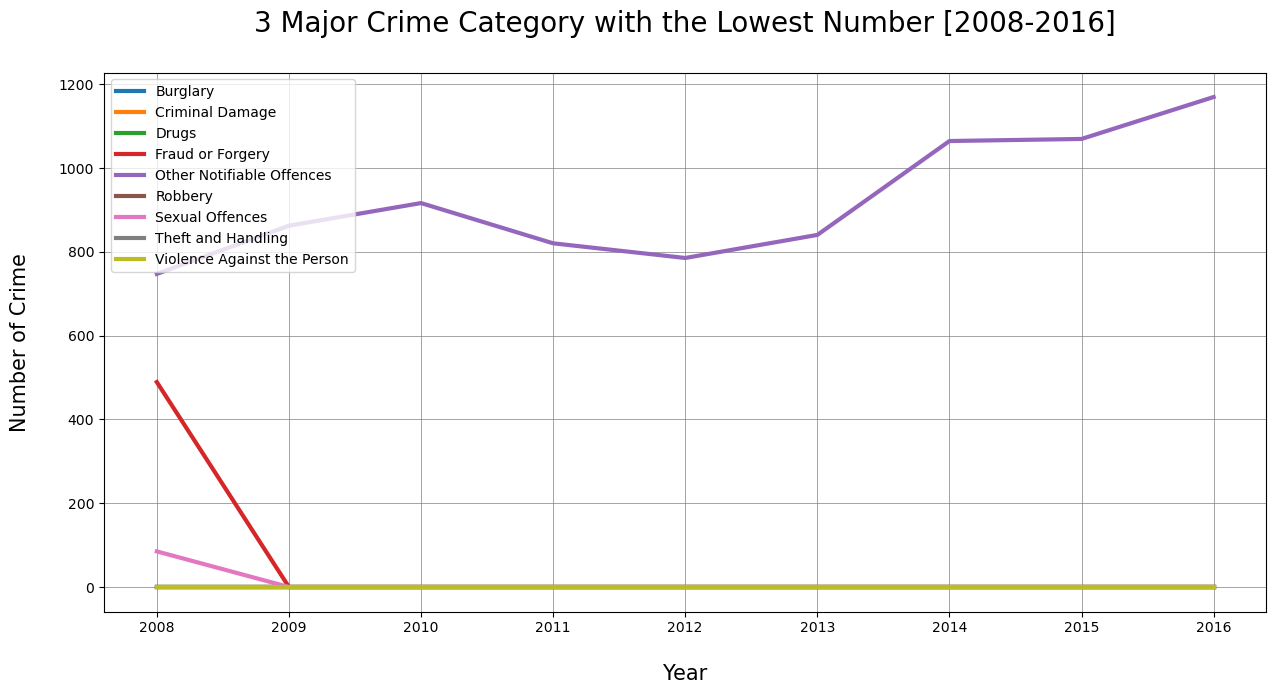

In [55]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_least3major.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("3 Major Crime Category with the Lowest Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

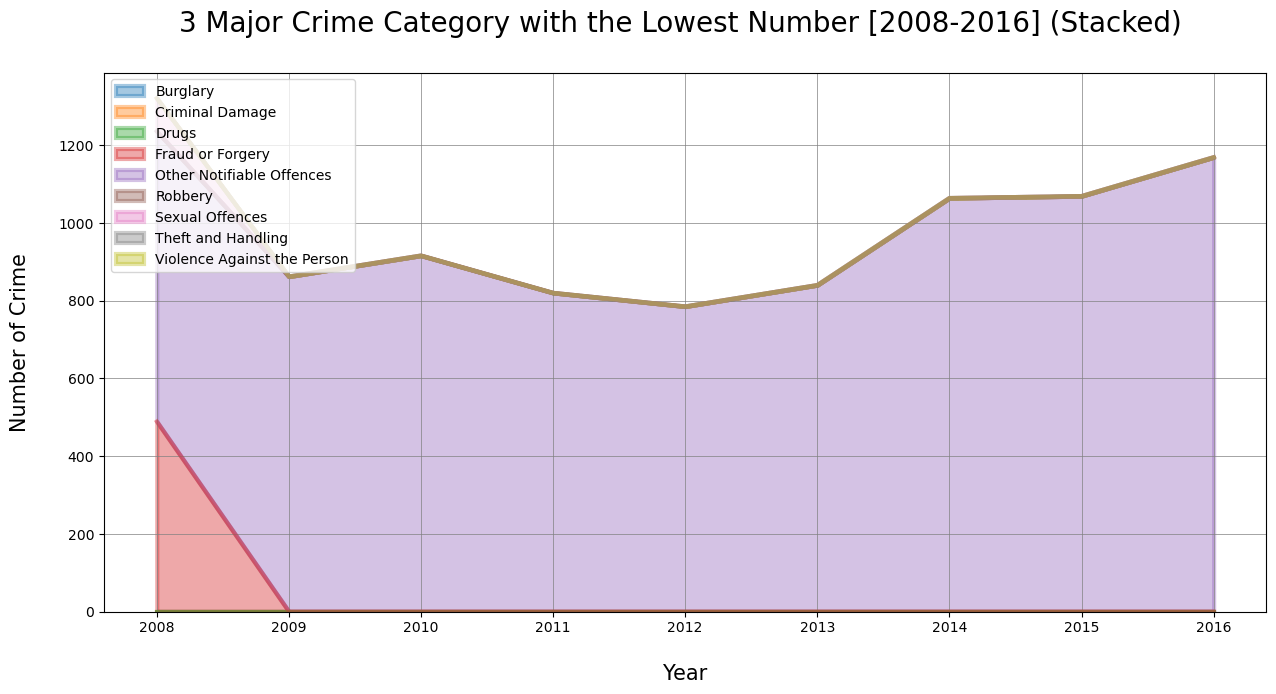

In [56]:
# STACKED AREA PLOT
df_least3major.plot(kind="area",
                    figsize=(15, 7),
                    alpha=0.4,
                    stacked=True,
                    linewidth=3)
plt.title(
    "3 Major Crime Category with the Lowest Number [2008-2016] (Stacked) \n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

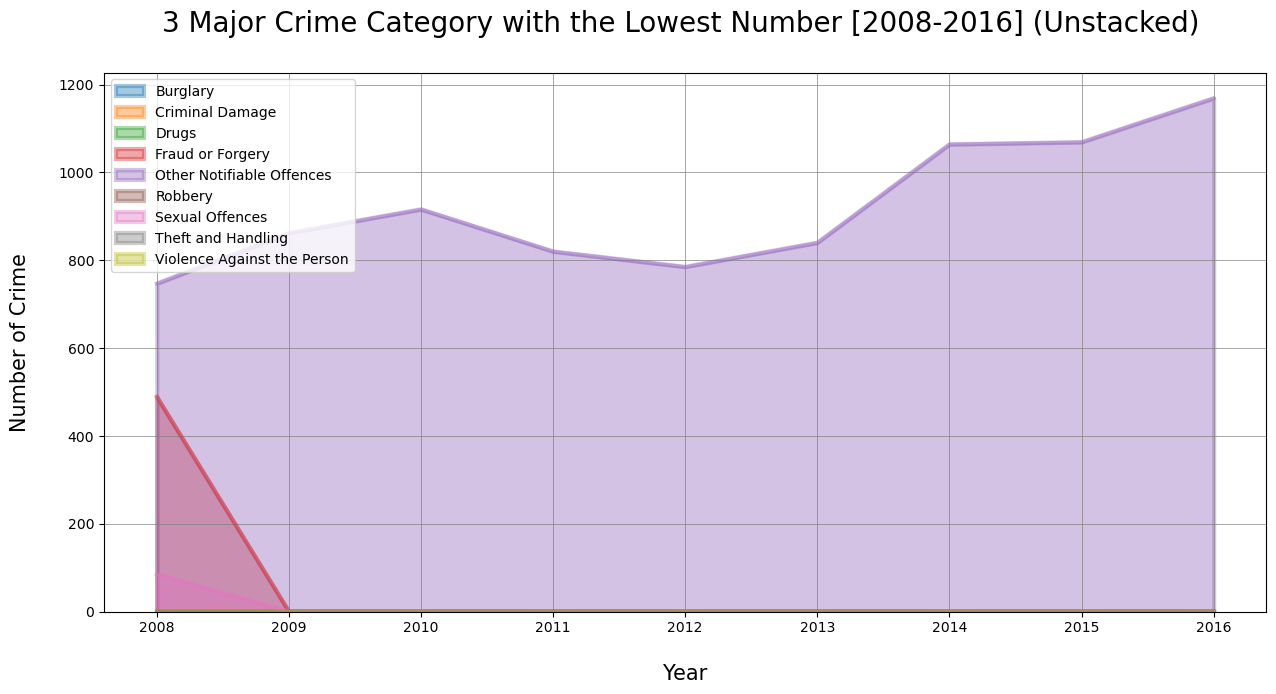

In [57]:
# UNSTACKED AREA PLOT
df_least3major.plot(kind="area",
                    figsize=(15, 7),
                    alpha=0.4,
                    stacked=False,
                    linewidth=3)
plt.title(
    "3 Major Crime Category with the Lowest Number [2008-2016] (Unstacked) \n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

Berdasarkan plot berikut, kita dapat mengetahui bahwa Sexual Offences dan Fraud or Forgery adalah kategori kejahatan/kriminal yang memiliki jumlah terendah dari tahun 2008-2016 dan hanya terjadi di tahun 2008, sehingga di tahun berikutnya sampai dengan tahun 2016, tidak ada kasus Sexual Offences dan Fraud or Forgery di wilayah metropolitan London. Sedangkan untuk kategori Other Notifiable Offences adalah kategori dengan jumlah terendah juga tetapi memiliki tren naik dari tahun 2008 sampai 2016 dan mencapai jumlah tertinggi di tahun 2016.

# Kategori minor kejahatan yang memiliki jumlah tertinggi pada tahun 2008-2016

In [58]:
top5_minor = london_crime.drop(["lsoa_code","borough","major_category","month"], axis=1).set_index("year")
top5_minor = top5_minor.groupby("minor_category").sum()
top5_minor = top5_minor.sort_values(by="value", ascending=False).head(5)
top5_minor

value
minor_category                 
Other Theft               74358
Theft From Motor Vehicle  44472
Burglary in a Dwelling    38406
Harassment                35663
Assault with Injury       35083

Other Theft adalah kategori minor yang memiliki jumlah tertinggi selama tahun 2008-2016.

In [59]:
# Tabel kategori minor kejahatan/kriminal tertinggi dari tahun 2008-2016

df_top5minor = london_crime.drop(["lsoa_code","borough","major_category","month"], axis=1).set_index("minor_category")
df_top5minor = df_top5minor.loc[top5_minor.index]
df_top5minor = pd.pivot_table(df_top5minor, values="value", aggfunc=np.sum, index="year", columns="minor_category")
df_top5minor

minor_category  Assault with Injury  Burglary in Other Buildings  \
year                                                               
2008                           4253                            0   
2009                           4263                            0   
2010                           4117                            0   
2011                           3871                            0   
2012                           3986                            0   
2013                           3137                            0   
2014                           3541                            0   
2015                           3891                            0   
2016                           4024                            0   

minor_category  Burglary in a Dwelling  Business Property  Common Assault  \
year                                                                        
2008                              4472                  0               0   
2009                              4666                  0               0   
2010                              4578                  0               0   
2011                              5042                  0               0   
2012                              4636                  0               0   
2013                              4531                  0               0   
2014                              3847                  0               0   
2015                              3374                  0               0   
2016                              3260                  0               0   

minor_category  Counted per Victim  Criminal Damage To Dwelling  \
year                                                              
2008                             0                            0   
2009                             0                            0   
2010                             0                            0   
2011                             0                            0   
2012                             0                            0   
2013                             0                            0   
2014                             0                            0   
2015                             0                            0   
2016                             0                            0   

minor_category  Criminal Damage To Motor Vehicle  \
year                                               
2008                                           0   
2009                                           0   
2010                                           0   
2011                                           0   
2012                                           0   
2013                                           0   
2014                                           0   
2015                                           0   
2016                                           0   

minor_category  Criminal Damage To Other Building  Drug Trafficking  ...  \
year                                                                 ...   
2008                                            0                 0  ...   
2009                                            0                 0  ...   
2010                                            0                 0  ...   
2011                                            0                 0  ...   
2012                                            0                 0  ...   
2013                                            0                 0  ...   
2014                                            0                 0  ...   
2015                                            0                 0  ...   
2016                                            0                 0  ...   

minor_category  Other Theft Person  Other violence  Personal Property  \
year                                                                    
2008                             0               0                  0   
2009                             0  

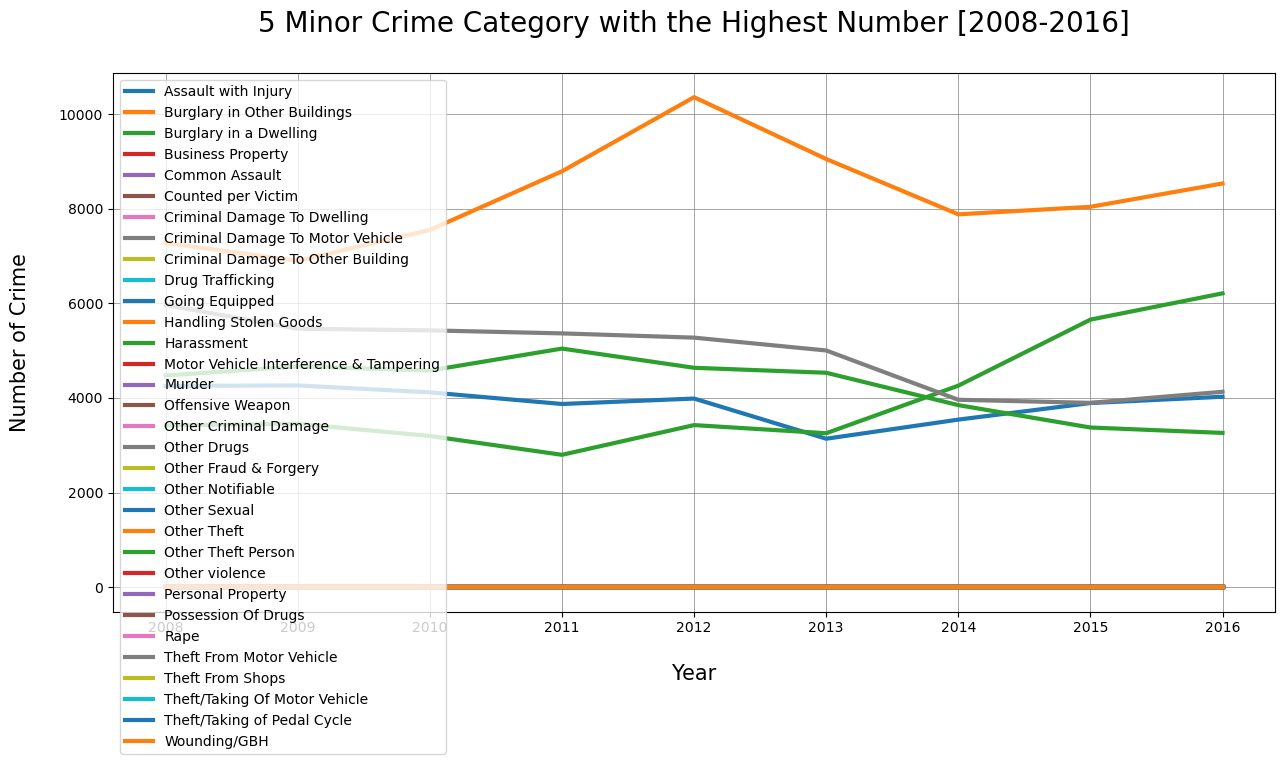

In [60]:
#LINE PLOT untuk melihat tren secara keseluruhan
df_top5minor.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("5 Minor Crime Category with the Highest Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

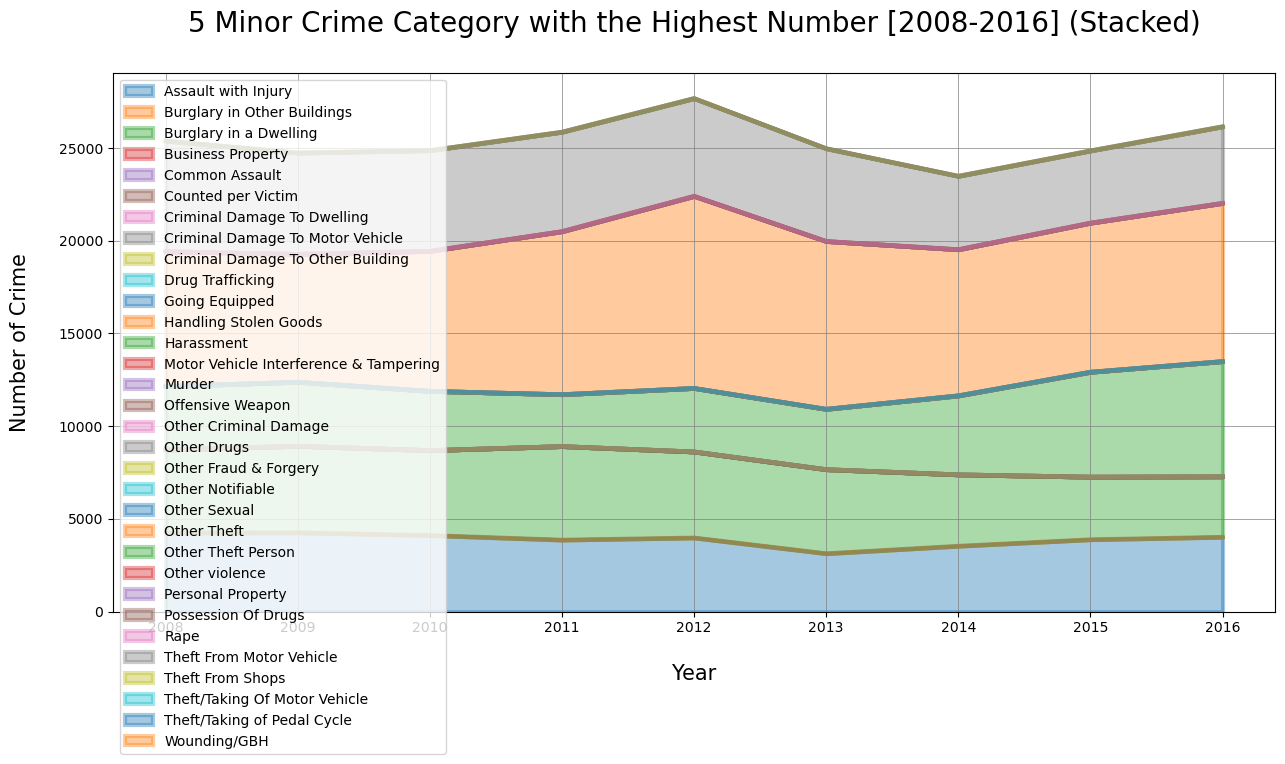

In [61]:
#STACKED AREA PLOT
df_top5minor.plot(kind="area", 
                  figsize=(15,7),
                  alpha=0.4,
                  stacked=True,
                 linewidth=3)
plt.title("5 Minor Crime Category with the Highest Number [2008-2016] (Stacked)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

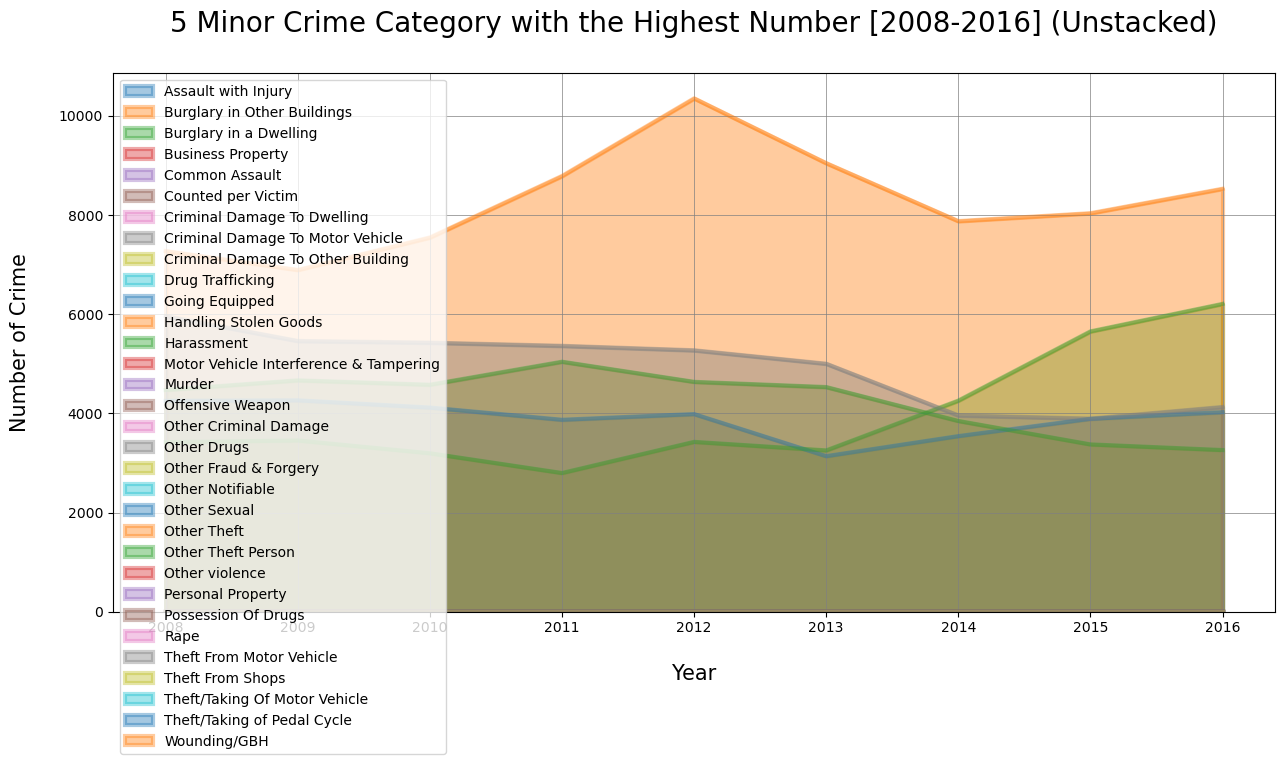

In [62]:
#UNSTACKED AREA PLOT
df_top5minor.plot(kind="area", 
                  figsize=(15,7),
                  alpha=0.4,
                  stacked=False,
                 linewidth=3)
plt.title("5 Minor Crime Category with the Highest Number [2008-2016] (Unstacked)\n", fontsize=20)
plt.xlabel("\nYear", fontsize=15)
plt.ylabel("Number of Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

 Other theft adalah kategori minor kejahatan/kriminal di wilayah metropolitan London dengan jumlah yang tertinggi dan diikuti dengan Theft From Motor Vehicle, Burglary in Dwelling, Harrasment, dan Assault with Injury. Kategori pencurian ini juga memiliki jumlah yang tinggi dan cukup signifikan perbedaannya apabila dibandingkan dengan kategori lain.

# Kesimpulan : dengan menggunakan Area Plot dapat disimpulkan bahwa:
1. Westminster adalah wilayah metropolitan di London yang memiliki jumlah kejahatan/kriminal tertinggi tahun 2008-2016 dengan perbedaan yang cukup besar dan signifikan dibanding dengan wilayah metropolitan di London yang memiliki jumlah kejahatan/kriminal tertinggi juga. Sedangkan wilayah metropolitan yang memiliki jumlah kejahatan/kriminal terendah adalah City of London dan perbedaan yang cukup signifikan dibanding dengan wilayah lainnya.
2. Kategori kejahatan/kriminal dengan jumlah tertinggi tahun 2008-2016 adalah Theft and Handling dengan kategori minor Other Theft. Sedangkan kategori dengan jumlah terendah adalah Sexual Offences.
3. Berdasarkan grafis, dapat dilihat bahwa rata-rata wilayah metropolitan di London atau kategori kejahatan/kriminal dengan jumlah tertinggi tahun 2008-2016 mencapai puncak angka kejahatan/kriminal tertinggi tahun 2012.
4. Fraud or Forgery dan Sexual Offences adalah kategori kejahatan/kriminal yang hanya terjadi di tahun 2008 dan tidak mencatat kasus di tahun berikutnya sampai dengan tahun 2016.

# **BAR CHART**
---

In [63]:
total_crime = london_crime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

value
year       
2008  56825
2009  54887
2010  54607
2011  55771
2012  57838
2013  53734
2014  51644
2015  55841
2016  57275

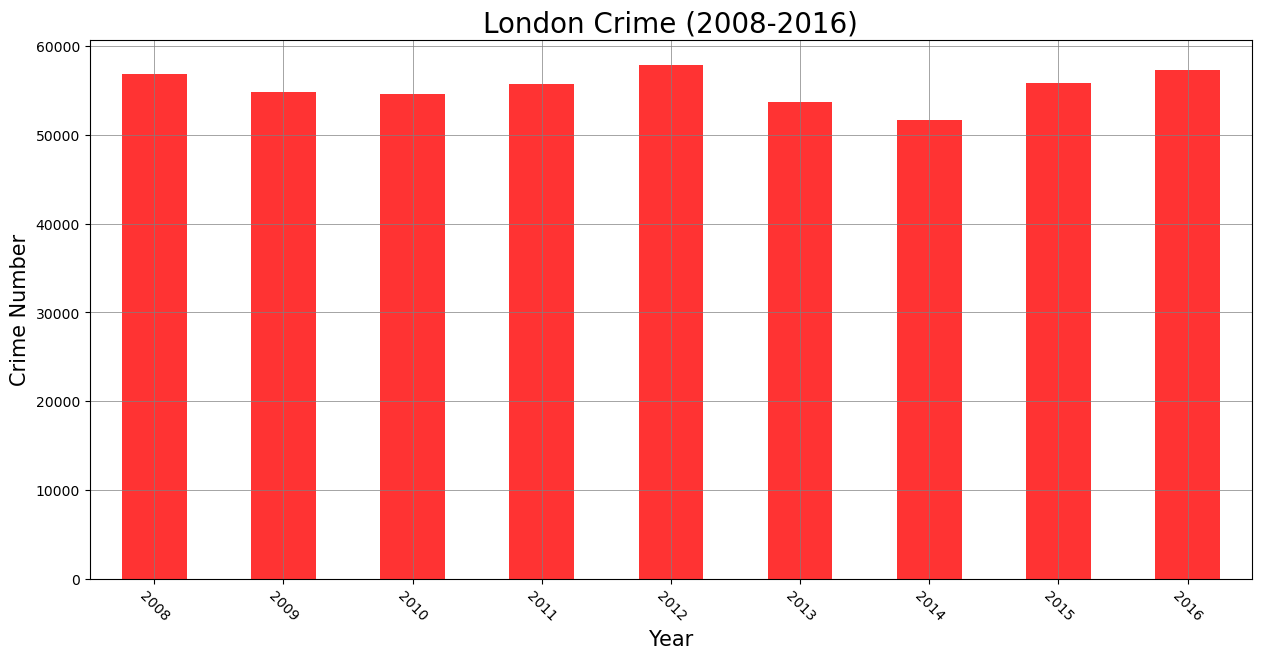

In [64]:
total_crime.plot(kind="bar",
                figsize=(15,7),
                color="red",
                legend=False,
                alpha=0.8)
plt.title("London Crime (2008-2016)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.xticks(rotation=-45)
plt.show()

 Jumlah kejahatan/kriminal di London tahun 2008-2012 mencapai lebih dari angka 50000 dan kemudian turun di tahun 2013 dan 2014, diikuti kenaikan hampir mencapai angka 60000 kasus di tahun 2015 dan 2016

## Jumlah kejahatan/kriminal di London berdasarkan kategori mayor tahun 2008-2016

In [65]:
totalCrimeEachType = london_crime.drop(["lsoa_code","borough","minor_category","year","month"], axis=1).groupby("major_category").sum()
totalCrimeEachType["value"].to_numpy()
totalCrimeEachType

value
major_category                     
Burglary                      58754
Criminal Damage               48162
Drugs                         35881
Fraud or Forgery                489
Other Notifiable Offences      8272
Robbery                       20431
Sexual Offences                  85
Theft and Handling           204713
Violence Against the Person  121635

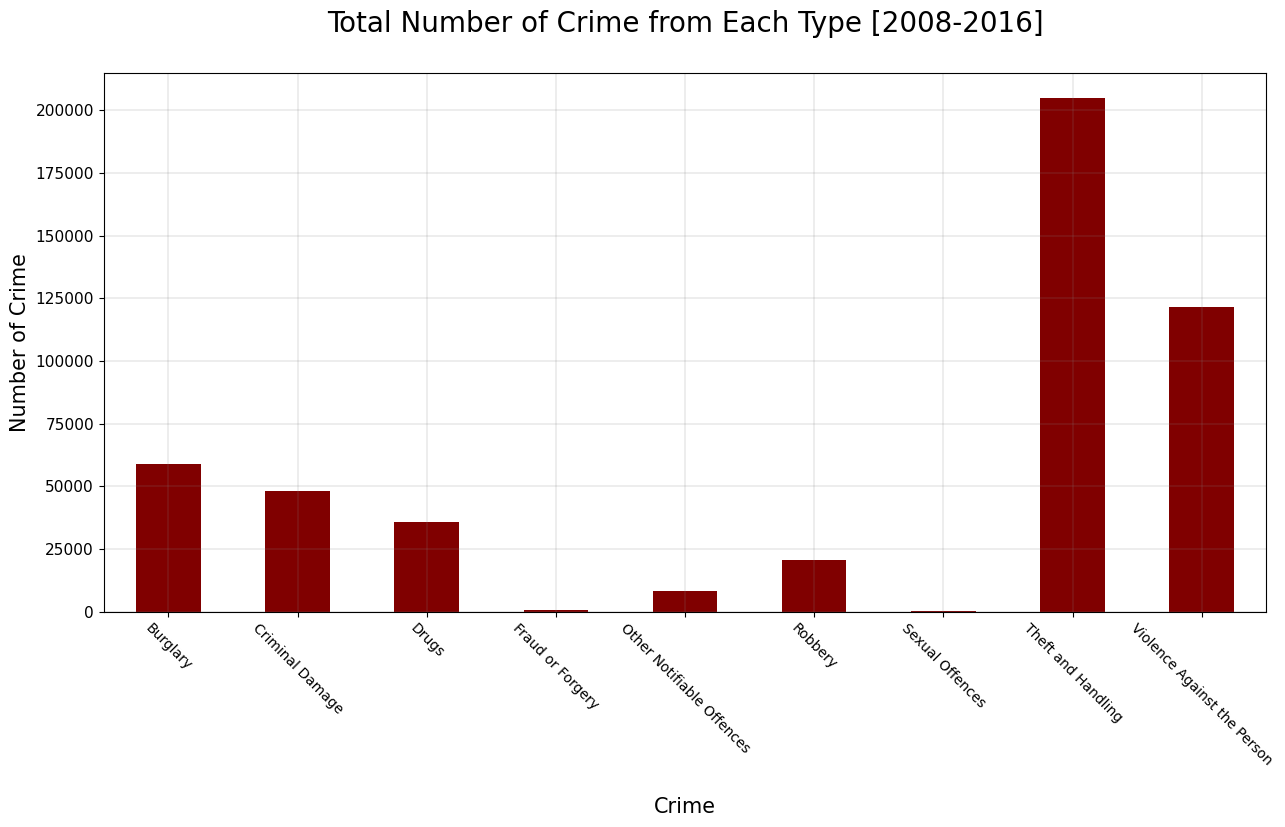

In [66]:
totalCrimeEachType.plot(kind="bar",
                        figsize=(15,7),
                        legend=False,
                        color="maroon")
plt.title("Total Number of Crime from Each Type [2008-2016]\n", fontsize=20)
plt.xlabel("\nCrime", fontsize=15)
plt.ylabel("Number of Crime", fontsize=15)
plt.xticks(rotation=-45)
plt.yticks(fontsize=11)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Theft and Handling adalah kategori kejahatan/kriminal yang mempunyai jumlah kasus paling tinggi tahun 2008-2016 diikuti dengan Violance Against the Person. Selain itu, Fraud or Forgery dan Sexual Offences adalah kategori kejahatan/kriminal yang memiliki jumlah kasus terendah.

## Jumlah kejahatan/kriminal di masing-masing wilayah metropolitan London tahun 2008-2016

In [67]:
totalCrimeEachBorough = london_crime.drop(
    ["lsoa_code", "major_category", "minor_category", "year", "month"], axis=1).groupby("borough").sum()
totalCrimeEachBorough["value"].to_numpy()
totalCrimeEachBorough = totalCrimeEachBorough.sort_values(
    by="value", ascending=True)
totalCrimeEachBorough

value
borough                      
City of London             64
Kingston upon Thames     6700
Richmond upon Thames     7283
Sutton                   7907
Merton                   8636
Bexley                   8770
Harrow                   9119
Havering                10886
Barking and Dagenham    11787
Kensington and Chelsea  12925
Redbridge               14172
Greenwich               14210
Hammersmith and Fulham  14330
Bromley                 14353
Hounslow                14616
Enfield                 15060
Hillingdon              16115
Waltham Forest          16164
Wandsworth              16212
Barnet                  16350
Lewisham                16627
Hackney                 16762
Haringey                16825
Brent                   17457
Islington               17821
Tower Hamlets           17885
Ealing                  19555
Croydon                 20139
Newham                  20591
Camden                  20829
Southwark               21696
Lambeth                 22504
Westminster             34072

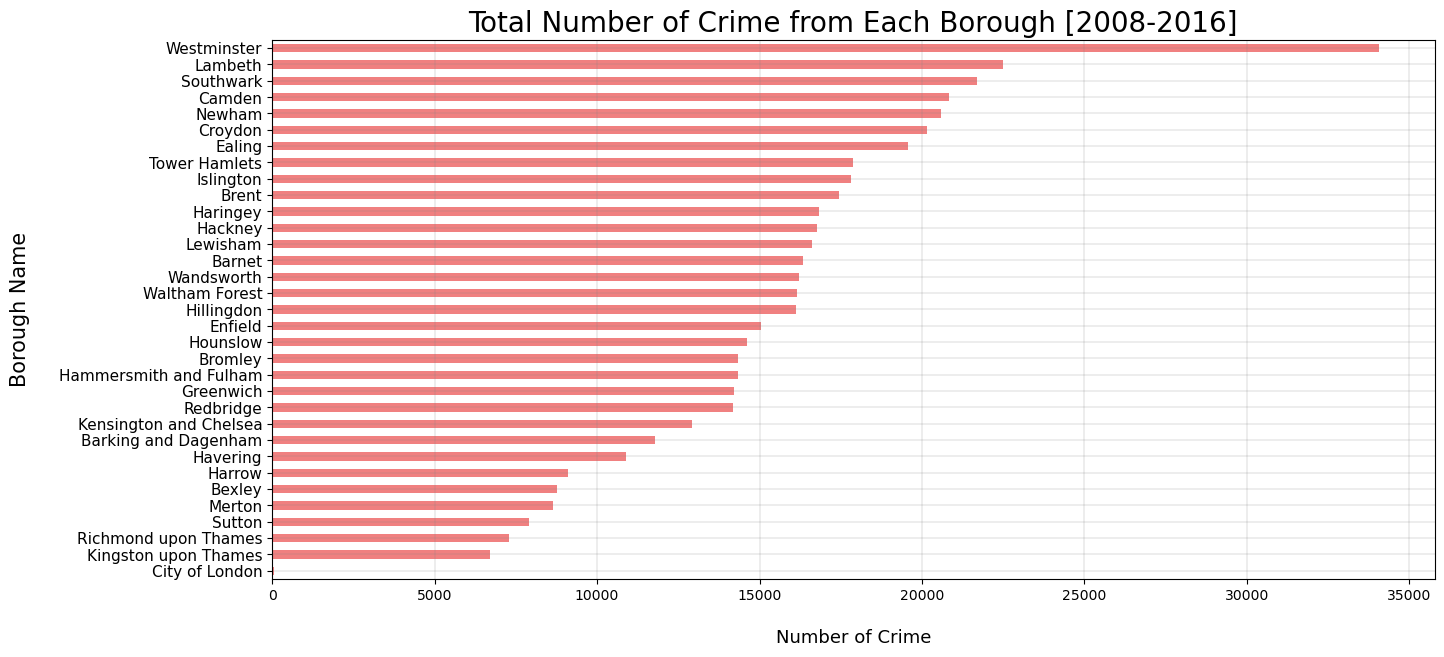

In [68]:
totalCrimeEachBorough.plot(kind="barh",
                           figsize=(15,7),
                           legend=False,
                           color="lightcoral")
plt.title("Total Number of Crime from Each Borough [2008-2016]", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=13)
plt.ylabel("Borough Name\n", fontsize=15)
plt.yticks(fontsize=11)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Westminster adalah wilayah yang memiliki jumlah kasus tertinggi selama tahun 2008-2016 dengan jumlah yang sangat signifikan apabila dibandingkan dengan wilayah lain

## Jumlah kejahatan/kriminal di London berdasarkan kategori minor tahun 2008-2016

In [69]:
# jumlah kasus kejahatan/kriminal masing-masing kategori tahun 2008-2016
minor_incidents = london_crime.drop(["lsoa_code","borough","year","month"],axis=1)
minorIncidents = pd.pivot_table(minor_incidents, index=["major_category","minor_category"], values="value", aggfunc=np.sum)
minorIncidents

value
major_category              minor_category                      
Burglary                    Assault with Injury                0
                            Burglary in Other Buildings    20348
                            Burglary in a Dwelling         38406
                            Business Property                  0
                            Common Assault                     0
...                                                          ...
Violence Against the Person Theft From Motor Vehicle           0
                            Theft From Shops                   0
                            Theft/Taking Of Motor Vehicle      0
                            Theft/Taking of Pedal Cycle        0
                            Wounding/GBH                    9907

[288 rows x 1 columns]

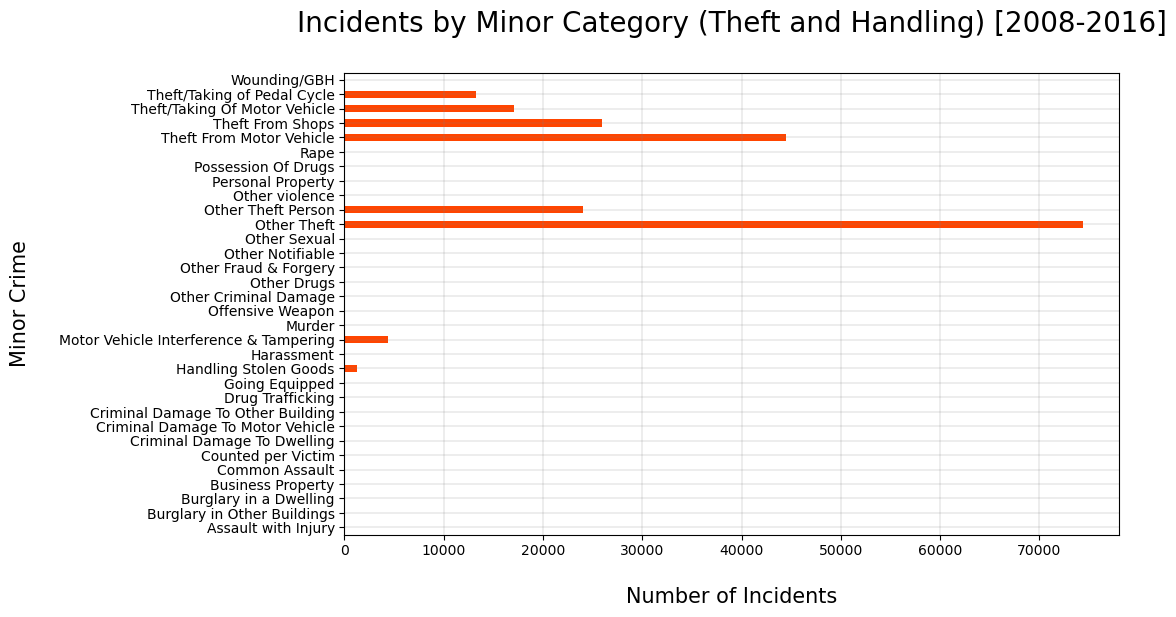

In [70]:
# Contoh kasus kategori Theft and Handling the Person yang disajikan melalui bar chart

theft_crime = minorIncidents.loc["Theft and Handling"]
theft_crime.plot(kind="barh",
                    figsize=(10,6),
                    legend=False,
                    color="orangered")
plt.title("Incidents by Minor Category (Theft and Handling) [2008-2016]\n", fontsize=20)
plt.xlabel("\nNumber of Incidents", fontsize=15)
plt.ylabel("Minor Crime\n", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Telah diketahui sebelumnya juga melalui Area Plot bahwa Other Theft adalah kategori minor kejahatan/kriminal dengan jumlah kasus tertinggi. Dengan Bar Chart, kita dapat melihat lebih spesifik bahwa kategori kasus pencurian yang memiliki jumlah kasus tertinggi adalah Theft From Motor Vehicle (pencurian kendaraan) dan Theft From Shops (pencurian di toko).

# Bar chart masing-masing kategori

In [71]:
london_crime["major_category"].unique()

['Burglary', 'Violence Against the Person', 'Robbery', 'Theft and Handling', 'Criminal Damage', 'Drugs', 'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences']
Categories (9, object): ['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery', ..., 'Robbery', 'Sexual Offences', 'Theft and Handling', 'Violence Against the Person']

In [72]:
burglary_crime = minorIncidents.loc["Burglary"]
violance_crime = minorIncidents.loc["Violence Against the Person"]
robbery_crime = minorIncidents.loc["Robbery"]
theft_crime = minorIncidents.loc["Theft and Handling"]
criminal_crime = minorIncidents.loc["Criminal Damage"]
drugs_crime = minorIncidents.loc["Drugs"]
fraud_crime = minorIncidents.loc["Fraud or Forgery"]
other_crime = minorIncidents.loc["Other Notifiable Offences"]
sexual_crime = minorIncidents.loc["Sexual Offences"]

Text(0, 0.5, 'Minor Category')

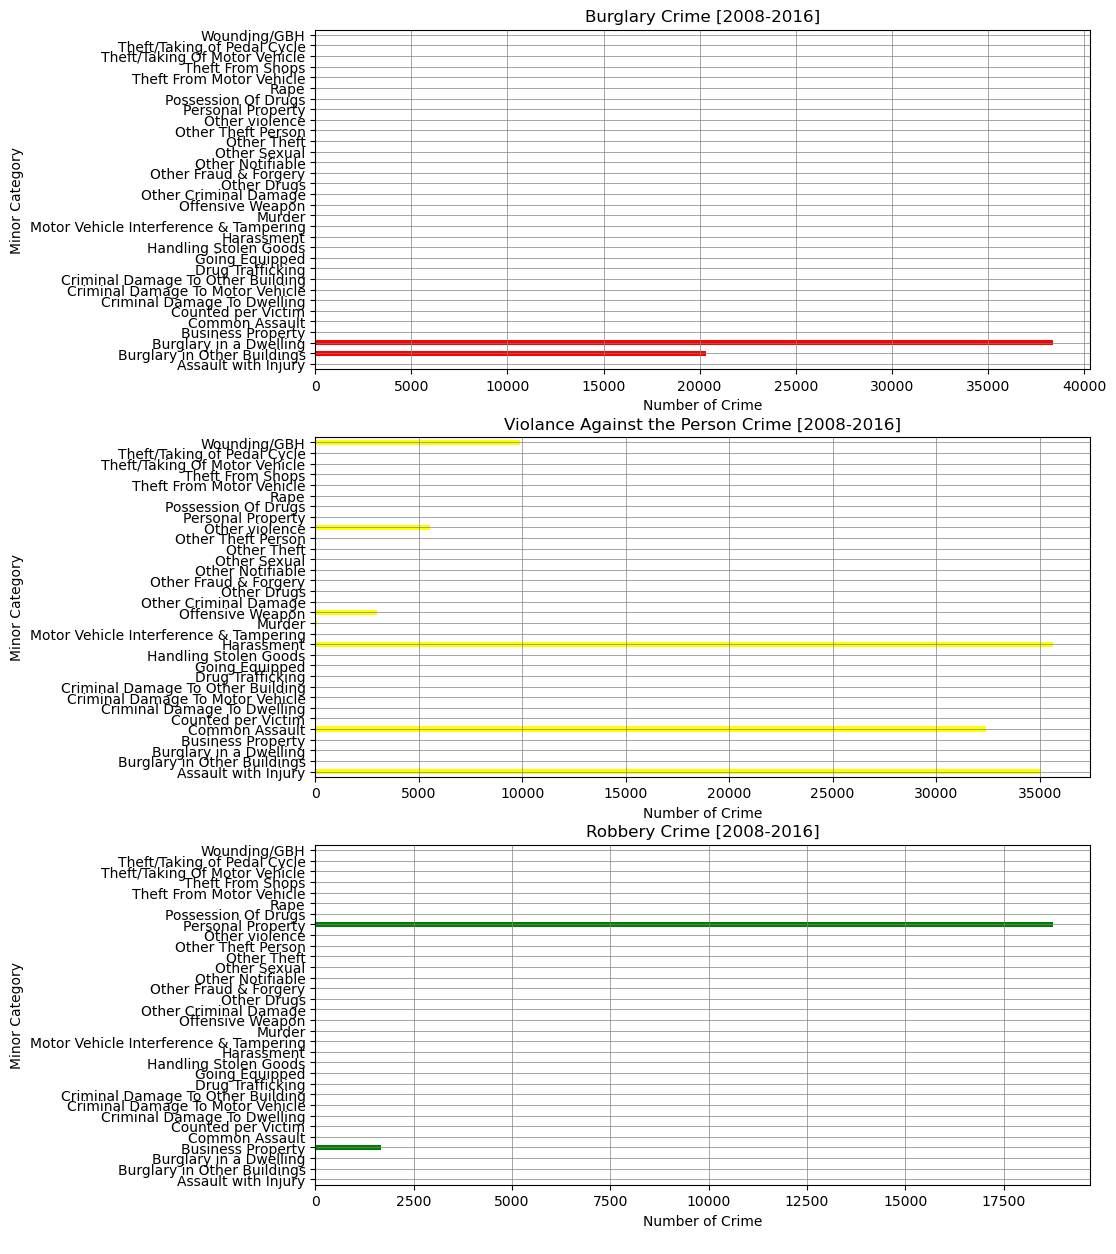

In [73]:
fig = plt.figure(figsize=(10,15))

#karena terdapat 9 kategori mayor, maka plot dibagi menjadi masing-masing 3 baris
ax0 = fig.add_subplot(3,1,1) #1
ax1 = fig.add_subplot(3,1,2) #2
ax2 = fig.add_subplot(3,1,3) #3

burglary_crime.plot(kind="barh", legend=False, ax=ax0, color="red")
ax0.set_title("Burglary Crime [2008-2016]")
ax0.grid(color="grey", linewidth=0.5)
ax0.set_xlabel("Number of Crime\n")
ax0.set_ylabel("Minor Category")

violance_crime.plot(kind="barh", legend=False, ax=ax1, color="yellow")
ax1.set_title("Violance Against the Person Crime [2008-2016]")
ax1.grid(color="grey", linewidth=0.5)
ax1.set_xlabel("Number of Crime\n")
ax1.set_ylabel("Minor Category")

robbery_crime.plot(kind="barh", legend=False, ax=ax2, color="green")
ax2.set_title("Robbery Crime [2008-2016]")
ax2.grid(color="grey", linewidth=0.5)
ax2.set_xlabel("Number of Crime\n")
ax2.set_ylabel("Minor Category")

Text(0, 0.5, 'Minor Category')

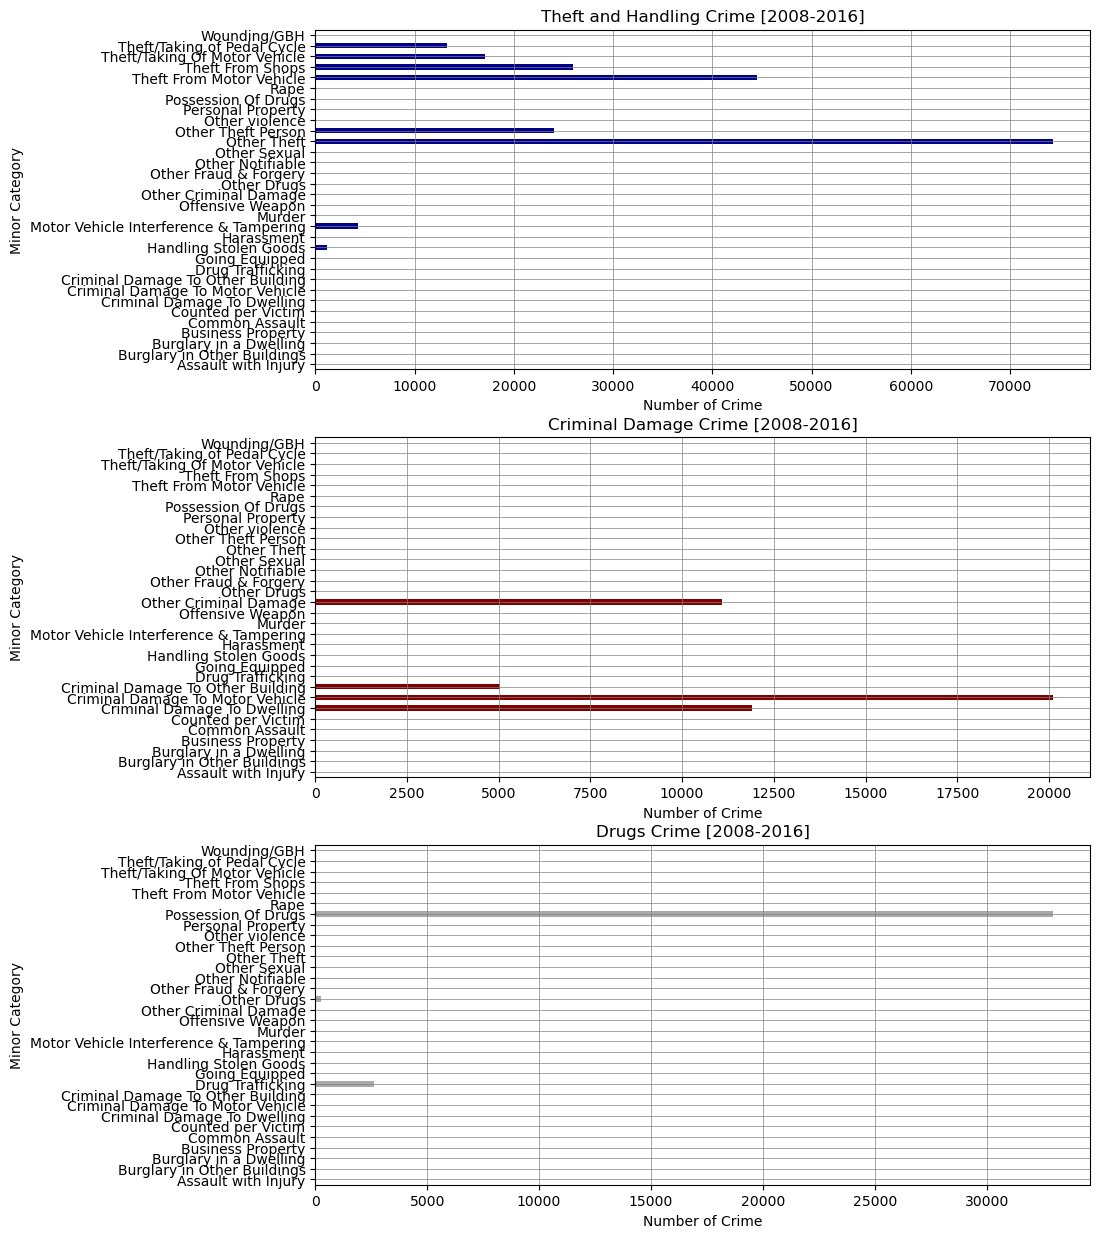

In [74]:
fig = plt.figure(figsize=(10,15))

#karena terdapat 9 kategori mayor, maka plot dibagi menjadi masing-masing 3 baris
ax3 = fig.add_subplot(3,1,1) #1
ax4 = fig.add_subplot(3,1,2) #2
ax5 = fig.add_subplot(3,1,3) #3

theft_crime.plot(kind="barh", legend=False, ax=ax3, color="darkblue")
ax3.set_title("Theft and Handling Crime [2008-2016]")
ax3.grid(color="grey", linewidth=0.5)
ax3.set_xlabel("Number of Crime")
ax3.set_ylabel("Minor Category")

criminal_crime.plot(kind="barh", legend=False, ax=ax4, color="maroon")
ax4.set_title("Criminal Damage Crime [2008-2016]")
ax4.grid(color="grey", linewidth=0.5)
ax4.set_xlabel("Number of Crime")
ax4.set_ylabel("Minor Category")

drugs_crime.plot(kind="barh", legend=False, ax=ax5, color="darkgrey")
ax5.set_title("Drugs Crime [2008-2016]")
ax5.grid(color="grey", linewidth=0.5)
ax5.set_xlabel("Number of Crime")
ax5.set_ylabel("Minor Category")

Text(0, 0.5, 'Minor Category')

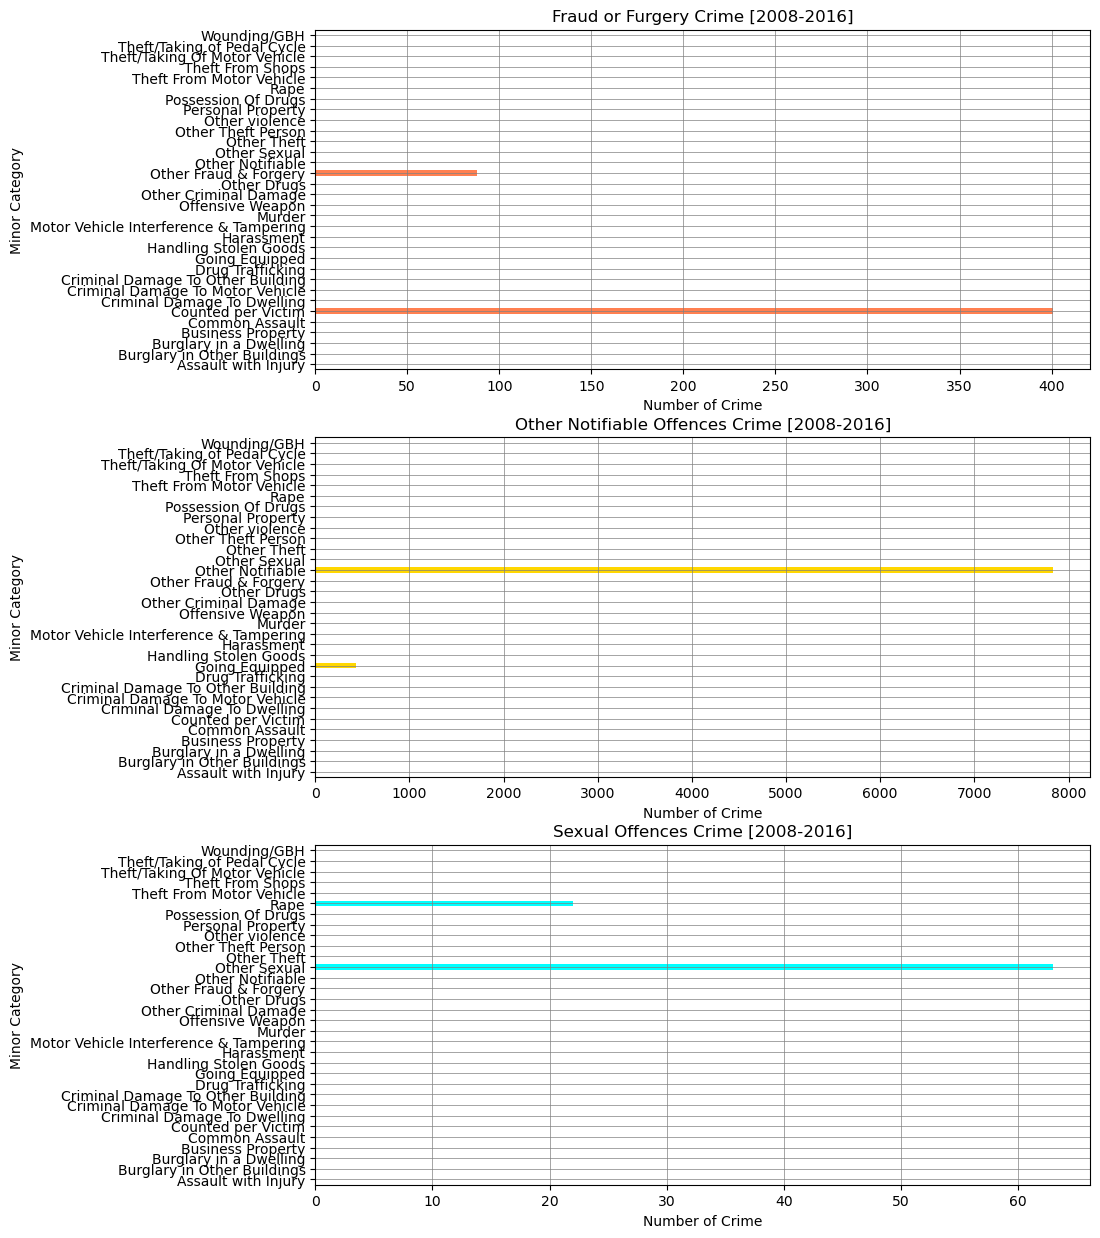

In [75]:
fig = plt.figure(figsize=(10,15))

#karena terdapat 9 kategori mayor, maka plot dibagi menjadi masing-masing 3 baris
ax6 = fig.add_subplot(3,1,1) #1
ax7 = fig.add_subplot(3,1,2) #2
ax8 = fig.add_subplot(3,1,3) #3

fraud_crime.plot(kind="barh", legend=False, ax=ax6, color="coral")
ax6.set_title("Fraud or Furgery Crime [2008-2016]")
ax6.grid(color="grey", linewidth=0.5)
ax6.set_xlabel("Number of Crime")
ax6.set_ylabel("Minor Category")

other_crime.plot(kind="barh", legend=False, ax=ax7, color="gold")
ax7.set_title("Other Notifiable Offences Crime [2008-2016]")
ax7.grid(color="grey", linewidth=0.5)
ax7.set_xlabel("Number of Crime")
ax7.set_ylabel("Minor Category")

sexual_crime.plot(kind="barh", legend=False, ax=ax8, color="aqua")
ax8.set_title("Sexual Offences Crime [2008-2016]")
ax8.grid(color="grey", linewidth=0.5)
ax8.set_xlabel("Number of Crime")
ax8.set_ylabel("Minor Category")

Berdasarkan plot batang di atas, kita dapat melihat masing-masing jumlah kasus kejahatan/kriminal kategori mayor di London berdasarkan kategori minornya. Dapat diketahui bahwa kejahatan/kriminal kategori Burglary yang paling dominan adalah Burglary in Dwelling, untuk kategori Robbery yang paling dominan adalah Personal Property, dan seterusnya.

# Wilayah metropolitan yang memiliki angka kasus tertinggi kategori kejahatan/kriminal tertentu selama tahun 2008-2016

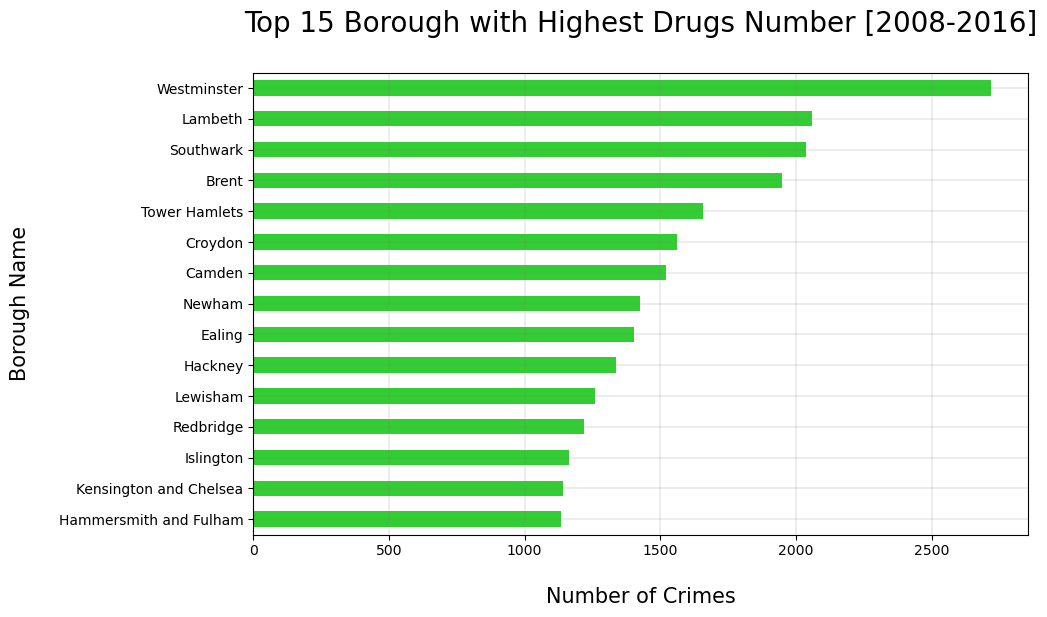

In [76]:
top15Borough_drug = london_crime.drop(["lsoa_code","minor_category","year","month"], axis=1)
top15Borough_drug = pd.pivot_table(top15Borough_drug, index=["major_category","borough"], values="value", aggfunc=np.sum)
top15Borough_drug = top15Borough_drug.loc["Drugs"].sort_values(by="value", ascending=True).tail(15)
top15Borough_drug.plot(kind="barh",
                        figsize=(10,6),
                        legend=False,
                        color="limegreen")
plt.title("Top 15 Borough with Highest Drugs Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nNumber of Crimes", fontsize=15)
plt.ylabel("Borough Name\n", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Westminster adalah wilayah metropolitan dengan jumlah kasus Drugs tertinggi selama tahun 2008-2016. Selanjutnya, dapat diketahui juga untuk kategori lain, misal kategori Burglary

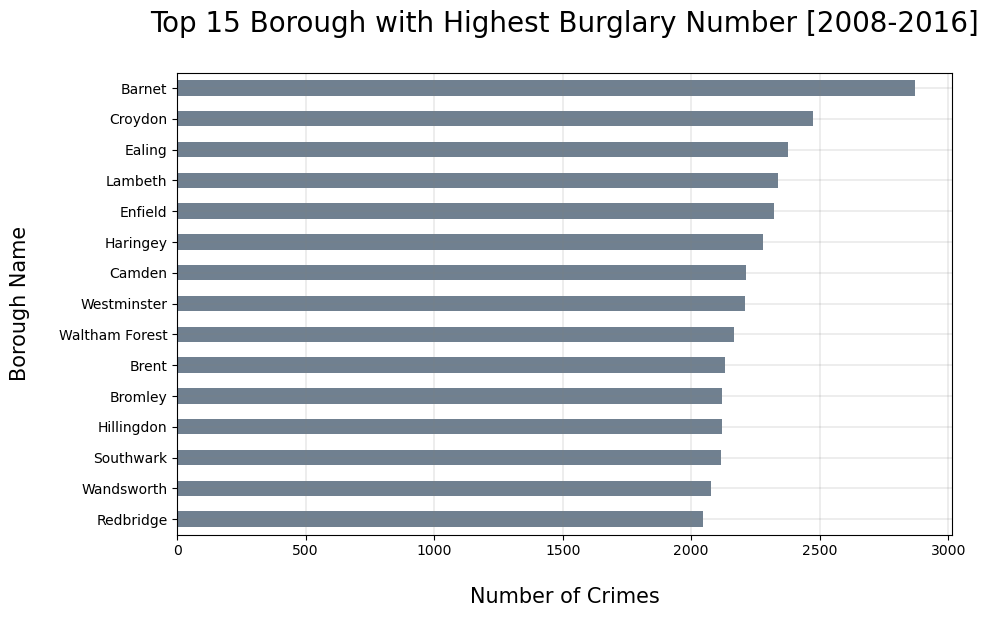

In [77]:
top15Borough_crime = london_crime.drop(["lsoa_code", "minor_category", "year", "month"], axis=1)
top15Borough_crime = pd.pivot_table(top15Borough_crime, index=["major_category", "borough"], values="value", aggfunc=np.sum)
top15Borough_crime = top15Borough_crime.loc["Burglary"].sort_values(by="value", ascending=True).tail(15)
top15Borough_crime.plot(kind="barh",
                        figsize=(10, 6),
                        legend=False,
                        color="slategrey")
plt.title("Top 15 Borough with Highest Burglary Number [2008-2016]\n", fontsize=20)
plt.xlabel("\nNumber of Crimes", fontsize=15)
plt.ylabel("Borough Name\n", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Untuk kategori Burglary, ternyata Barnet adalah wilayah dengan kasus Burglary tertinggi diikuti dengan Croydon, Ealing, dan seterusnya. Dengan Bar Chart, kita dapat melihat untuk kategori-kategori lain.

# Wilayah metropolitan yang memiliki angka kasus tertinggi di tahun tertentu

In [78]:
crime2008 = london_crime.drop(["lsoa_code","major_category","minor_category","month"],axis=1).set_index("year")
crime2008 = crime2008.loc[2008]
crime2008 = crime2008.groupby("borough").sum().sort_values(by="value")
crime2008

value
borough                      
City of London              0
Richmond upon Thames      795
Kingston upon Thames      848
Sutton                    908
Merton                   1009
Harrow                   1013
Bexley                   1136
Havering                 1296
Barking and Dagenham     1411
Kensington and Chelsea   1506
Hounslow                 1605
Redbridge                1656
Enfield                  1676
Hammersmith and Fulham   1678
Greenwich                1730
Hackney                  1768
Brent                    1821
Wandsworth               1829
Waltham Forest           1892
Barnet                   1934
Bromley                  1936
Tower Hamlets            1941
Hillingdon               1946
Islington                1948
Haringey                 2016
Lewisham                 2084
Ealing                   2191
Croydon                  2274
Newham                   2297
Camden                   2454
Lambeth                  2487
Southwark                2700
Westminster              3040

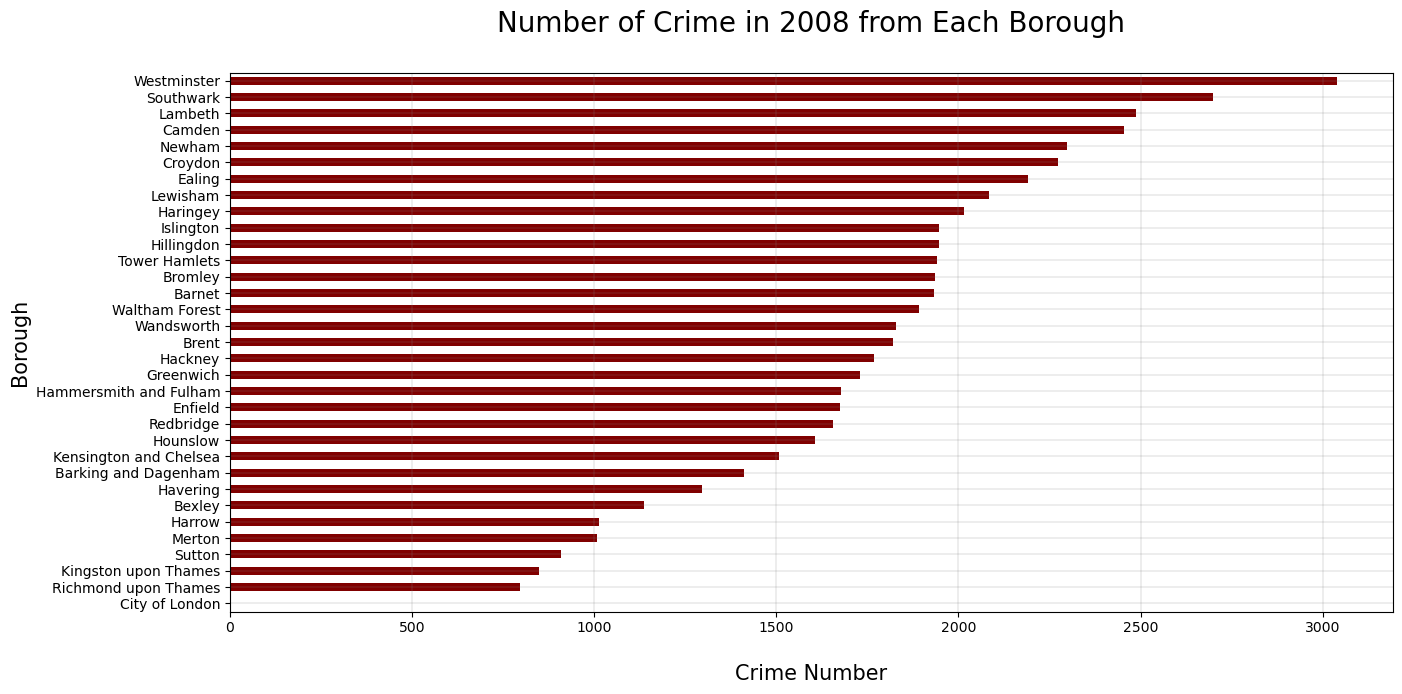

In [79]:
crime2008.plot(kind="barh",
               figsize=(15,7),
               legend=False,
              color="maroon")
plt.title("Number of Crime in 2008 from Each Borough\n", fontsize=20)
plt.xlabel("\nCrime Number", fontsize=15)
plt.ylabel("Borough", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Berdasarkan plot di atas, diketahui bahwa Westminster adalah wilayah dengan jumlah kasus tertinggi di tahun 2008 diikuti dengan Southwark, Camden, dan seterusnya. Kini, kita dapat membandingkan apakah ketiga wilayah ini adalah wilayah dengan kasus tertinggi di tahun 2016, yaitu sebagai berikut:

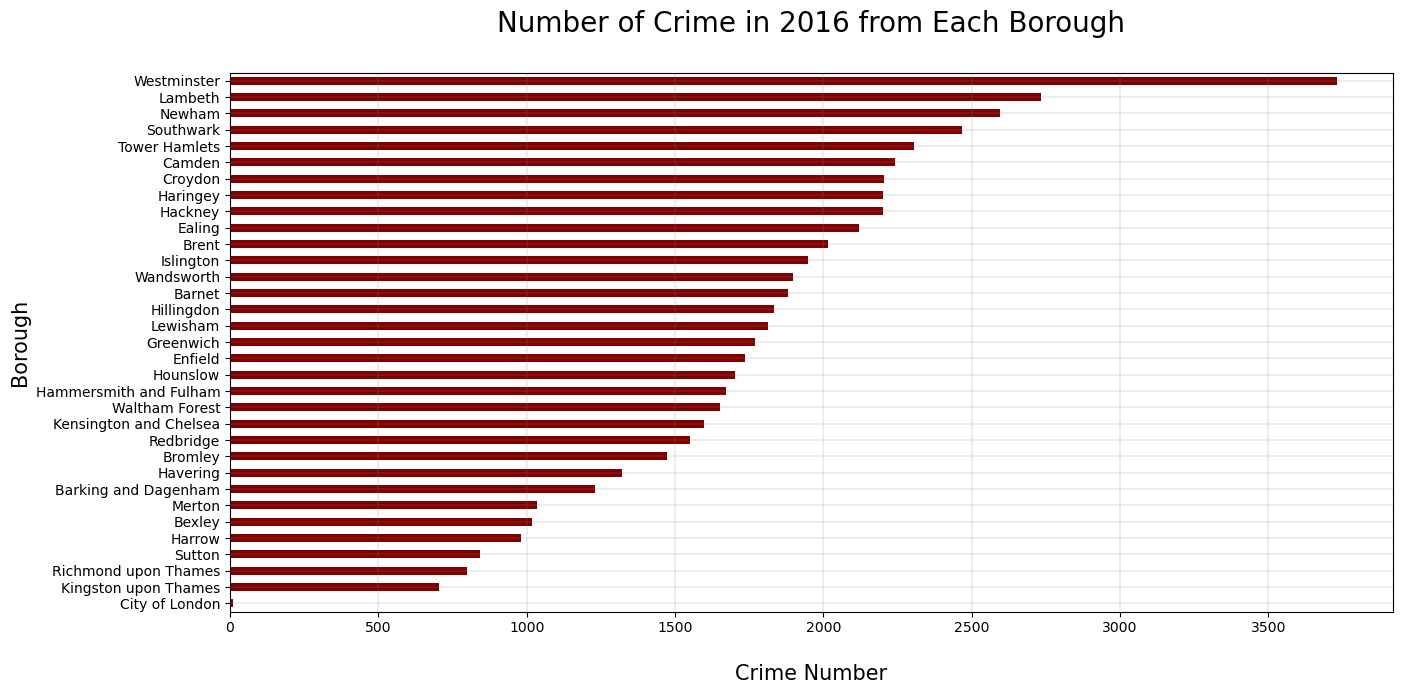

In [80]:
crime2016 = london_crime.drop(["lsoa_code","major_category","minor_category","month"],axis=1).set_index("year")
crime2016 = crime2016.loc[2016]
crime2016 = crime2016.groupby("borough").sum().sort_values(by="value")
crime2016.plot(kind="barh",
               figsize=(15,7),
               legend=False,
              color="maroon")
plt.title("Number of Crime in 2016 from Each Borough\n", fontsize=20)
plt.xlabel("\nCrime Number", fontsize=15)
plt.ylabel("Borough", fontsize=15)
plt.grid(color="grey", linewidth=0.2)
plt.show()

Di tahun 2016, Westminster masih menjadi wilayah dengan kasus tertinggi diikuti dengan Lambeth dan Southwark. Southwark masih menjadi wilayah teratas, tetapi tidak dengan Camden di tahun 2016.

# Kategori kejahatan/kriminal yang memiliki angka kasus tertinggi di tahun tertentu

In [81]:
# Tahun 2014

major2014 = london_crime.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("year")
major2014 = major2014.loc[2014].groupby("major_category").sum()
major2014 = major2014.sort_values(by="value")
major2014

value
major_category                    
Fraud or Forgery                 0
Sexual Offences                  0
Other Notifiable Offences     1064
Robbery                       1796
Drugs                         3425
Criminal Damage               4426
Burglary                      6006
Violence Against the Person  14360
Theft and Handling           20567

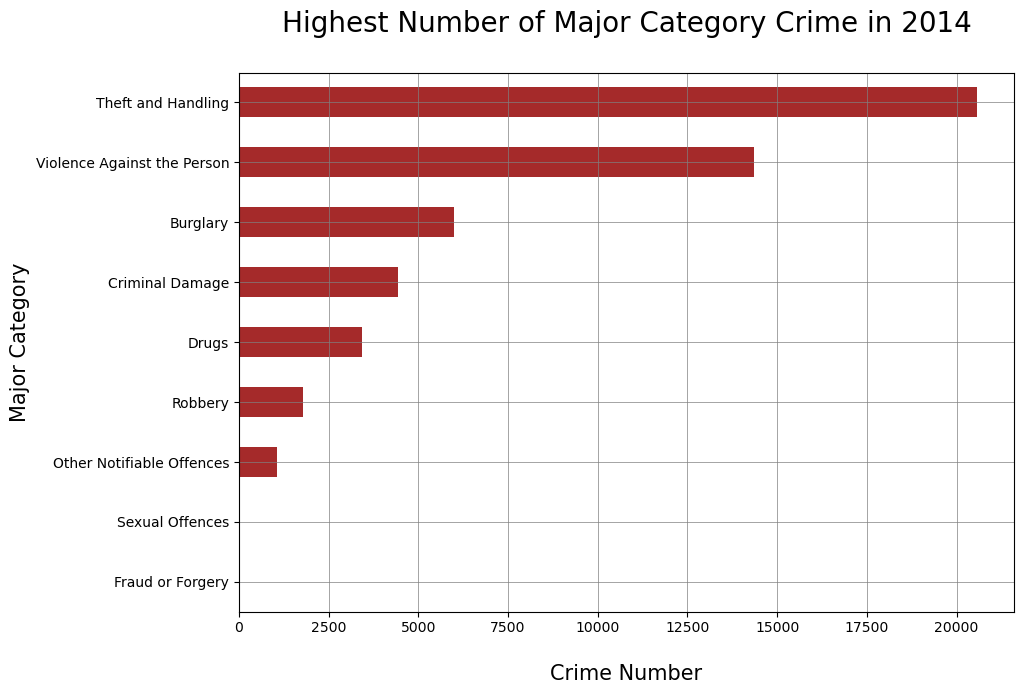

In [82]:
major2014.plot(kind="barh",
               figsize=(10,7),
               color="brown",
               legend=False)
plt.title("Highest Number of Major Category Crime in 2014\n", fontsize=20)
plt.xlabel("\nCrime Number", fontsize=15)
plt.ylabel("Major Category", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Berdasarkan plot di atas, diketahui bahwa Theft and Handling adalah kategori yang memiliki jumlah kasus tertinggi di tahun 2014. Sedangkan Robbery dan Other Notifiable Offences adalah yang terendah. Sexual Offences dan Fraud or Forgery adalah kategori yang sudah tidak mencetak kasus sejak 2008. Kita juga dapat melihat ebih spesifik dan membandingkan di tahun-tahun lain dari 2008-2016.

In [83]:
print(london_crime["major_category"].unique())
print(london_crime["borough"].unique())

['Burglary', 'Violence Against the Person', 'Robbery', 'Theft and Handling', 'Criminal Damage', 'Drugs', 'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences']
Categories (9, object): ['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery', ..., 'Robbery', 'Sexual Offences', 'Theft and Handling', 'Violence Against the Person']
['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth', ..., 'Islington', 'Tower Hamlets', 'Hammersmith and Fulham', 'Merton', 'City of London']
Length: 33
Categories (33, object): ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', ..., 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']


# Kesimpulan :

1. Kategori kejahatan/kriminal apa yang paling dominan di wilayah metropolitan tertentu di tahun tertentu (misal kategori kejahatan/kriminal yang paling dominan di Croydon tahun 2013),
2. Wilayah metropolitan mana yang memiliki jumlah kasus tertinggi kategori kejahatan/kriminal tertentu di tahun tertentu (misal wilayah mana yang memiliki jumlah kasus Sexual Offences tertinggi di tahun 2008),
3. Pada tahun berapa wilayah metropolitan tertentu memiliki kasus kategori kejahatan/kriminal tertentu (misal pada tahun berapa Brent memiliki jumlah kasus tertinggi kategori Drugs),
4. Pada bulan apa wilayah tertentu mencapai jumlah kasus tertinggi kategori kejahatan/kriminal tertentu (misal selama tahun 2008-2016, bulan apa yang dominan untuk Westminster mencapai jumlah kasus tertinggi kategori Theft and Handling), 
5. Pada bulan apa kategori kejahatan/kriminal tertentu memiliki jumlah kasus tertinggi di tahun tertentu (misal pada bulan apa kategori Violance Against the Person mencapai jumlah kasus tertinggi di tahun 2010),
6. Pada bulan apa wilayah metropolitan tertentu memiliki kasus kategori kejahatan/kriminal tertentu di tahun tertentu (misal pada bulan apa Westminster mencapai jumlah kasus tertinggi kategori Theft and Handling di tahun 2016), dst.

## HISTOGRAM
---

# Distribusi frekuensi jumlah kejahatan/kriminal tahun 2008-2016

In [84]:
# jumlah kejahatan/kriminal selama tahun 2008-2016
year_frequency = london_crime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
year_frequency = year_frequency.groupby("year").sum()
year_frequency

value
year       
2008  56825
2009  54887
2010  54607
2011  55771
2012  57838
2013  53734
2014  51644
2015  55841
2016  57275

In [85]:
# partisi sumbu x menjadi beberapa bin
count, bin_edges = np.histogram(year_frequency)
print(count)
print(bin_edges)

[1 0 0 1 1 1 2 0 1 2]
[51644.  52263.4 52882.8 53502.2 54121.6 54741.  55360.4 55979.8 56599.2
 57218.6 57838. ]


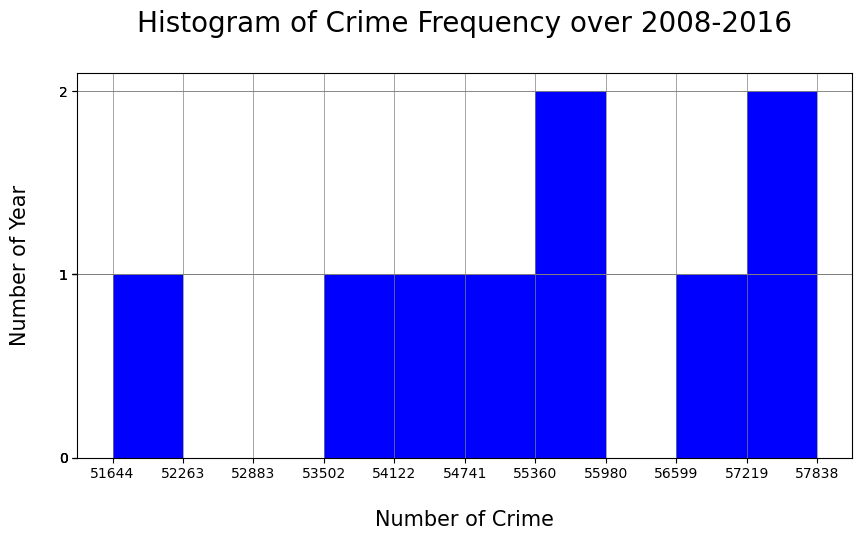

In [86]:
year_frequency.plot(kind="hist",
                     figsize=(10,5),
                     xticks=bin_edges,
                     yticks=count,
                     legend=False,
                     color="blue")
plt.title("Histogram of Crime Frequency over 2008-2016\n", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=15)
plt.ylabel("Number of Year\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Berdasarkan histogram berikut, diketahui bahwa jumlah kejahatan/kriminal berkisar 732795 sampai 738641 memiliki frekuensi tertinggi yaitu 3. Artinya, selama 3 tahun dari 2008-2016, jumlah kejahatan/kriminal di seluruh wilayah metropolitan London berjumlah 732795 sampai 738641. Secara keseluruhan, selama tahun 2008-2016, jumlah kejahatan/kriminal paling rendah adalah 680183 dan tertinggi 738641.

# Distribusi frekuensi jumlah kejahatan/kriminal yang terjadi di wilayah metropolitan London tahun 2008-2016

In [87]:
#  jumlah kejahatan/kriminal di masing-masing wilayah metropolitan di London/borough selama tahun 2008-2016
crime_frequency = london_crime.drop(["lsoa_code","major_category","minor_category","month","year"], axis=1)
crime_frequency = crime_frequency.groupby("borough").sum()
crime_frequency

value
borough                      
Barking and Dagenham    11787
Barnet                  16350
Bexley                   8770
Brent                   17457
Bromley                 14353
Camden                  20829
City of London             64
Croydon                 20139
Ealing                  19555
Enfield                 15060
Greenwich               14210
Hackney                 16762
Hammersmith and Fulham  14330
Haringey                16825
Harrow                   9119
Havering                10886
Hillingdon              16115
Hounslow                14616
Islington               17821
Kensington and Chelsea  12925
Kingston upon Thames     6700
Lambeth                 22504
Lewisham                16627
Merton                   8636
Newham                  20591
Redbridge               14172
Richmond upon Thames     7283
Southwark               21696
Sutton                   7907
Tower Hamlets           17885
Waltham Forest          16164
Wandsworth              16212
Westminster             34072

In [88]:
count, bin_edges = np.histogram(crime_frequency)
print(count)
print(bin_edges)

[ 1  1  5  3 13  5  4  0  0  1]
[   64.   3464.8  6865.6 10266.4 13667.2 17068.  20468.8 23869.6 27270.4
 30671.2 34072. ]


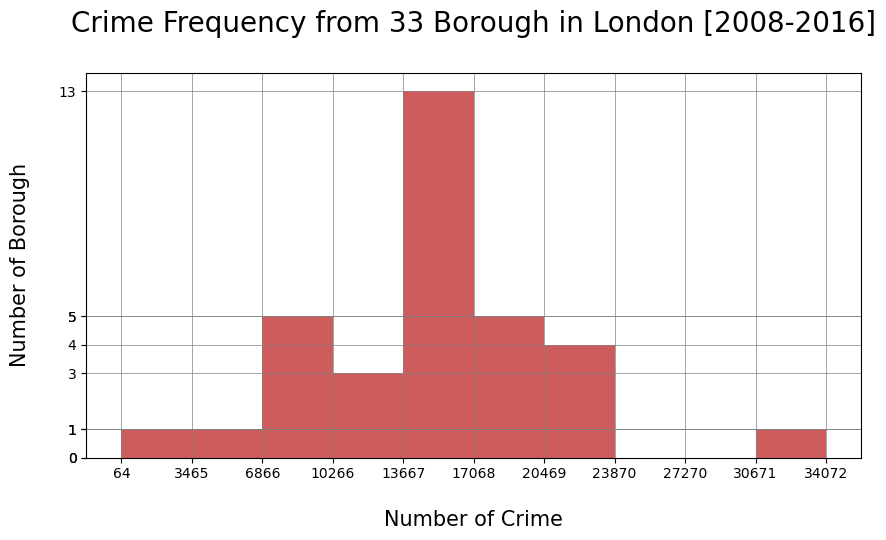

In [89]:
crime_frequency.plot(kind="hist",
                     figsize=(10,5),
                     xticks=bin_edges,
                     yticks=count,
                     legend=False,
                     color="indianred")
plt.title("Crime Frequency from 33 Borough in London [2008-2016]\n", fontsize=20)
plt.xlabel("\nNumber of Crime", fontsize=15)
plt.ylabel("Number of Borough\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Berdasarkan histogram berikut, diketahui bahwa frekuensi tertinggi jumlah kejahatan/kriminal adalah antara 13667 sampai dengan 17068 yaitu sebanyak 13 wilayah metropolitan/_borough_. Artinya, terdapat 13 _borough_ yang memiliki jumlah kejahatan/kriminal antara 13667 sampai dengan 17068 selama tahun 2008-2016. Selain itu frekuensi terkecil jumlah kejahatan/kriminal tertinggi adalah 30671 sampai 34072, yang berarti terdapat 1 _borough_ yang memiliki jumlah kejahatan/kriminal 30671 sampai 34072. Begitu pun dengan jumlah kejahatan/kriminal dari 64 sampai dengan 3465 yaitu sebanyak 1 _borough_.

#  Distribusi frekuensi jumlah kejahatan/kriminal di wilayah metropolitan/borough pada tahun 2012 dan 2016

In [90]:
# Jumlah kejahatan/kriminal yang terjadi di tahun 2016
frequency = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1).set_index("year")
frequency16 = frequency.loc[2016]
frequency16 = frequency16.groupby("borough").sum()
frequency16

value
borough                      
Barking and Dagenham     1229
Barnet                   1882
Bexley                   1018
Brent                    2014
Bromley                  1472
Camden                   2240
City of London              9
Croydon                  2205
Ealing                   2120
Enfield                  1735
Greenwich                1770
Hackney                  2200
Hammersmith and Fulham   1672
Haringey                 2201
Harrow                    980
Havering                 1321
Hillingdon               1832
Hounslow                 1702
Islington                1949
Kensington and Chelsea   1597
Kingston upon Thames      704
Lambeth                  2733
Lewisham                 1814
Merton                   1035
Newham                   2597
Redbridge                1550
Richmond upon Thames      798
Southwark                2469
Sutton                    842
Tower Hamlets            2304
Waltham Forest           1650
Wandsworth               1899
Westminster              3732

In [91]:
# Jumlah kejahatan/kriminal yang terjadi di tahun 2012
frequency12 = frequency.loc[2012]
frequency12 = frequency12.groupby("borough").sum()
frequency12

value
borough                      
Barking and Dagenham     1357
Barnet                   1748
Bexley                    832
Brent                    2104
Bromley                  1689
Camden                   2435
City of London             20
Croydon                  2205
Ealing                   2193
Enfield                  1582
Greenwich                1518
Hackney                  2233
Hammersmith and Fulham   1698
Haringey                 1851
Harrow                   1030
Havering                 1151
Hillingdon               1696
Hounslow                 1706
Islington                1866
Kensington and Chelsea   1580
Kingston upon Thames      656
Lambeth                  2447
Lewisham                 1661
Merton                    979
Newham                   2334
Redbridge                1684
Richmond upon Thames      925
Southwark                2373
Sutton                    865
Tower Hamlets            2063
Waltham Forest           1848
Wandsworth               1896
Westminster              5613

In [92]:
#Tahun 2012
count12, bin_edges12 = np.histogram(frequency12)
print(count12)
print(bin_edges12)

[ 1  6  9 12  4  0  0  0  0  1]
[  20.   579.3 1138.6 1697.9 2257.2 2816.5 3375.8 3935.1 4494.4 5053.7
 5613. ]


In [93]:
#Tahun 2016
count16, bin_edges16 = np.histogram(frequency16)
print(count16)
print(bin_edges16)

[1 1 5 3 9 9 3 1 0 1]
[   9.   381.3  753.6 1125.9 1498.2 1870.5 2242.8 2615.1 2987.4 3359.7
 3732. ]


Text(0, 0.5, 'Number of Borough')

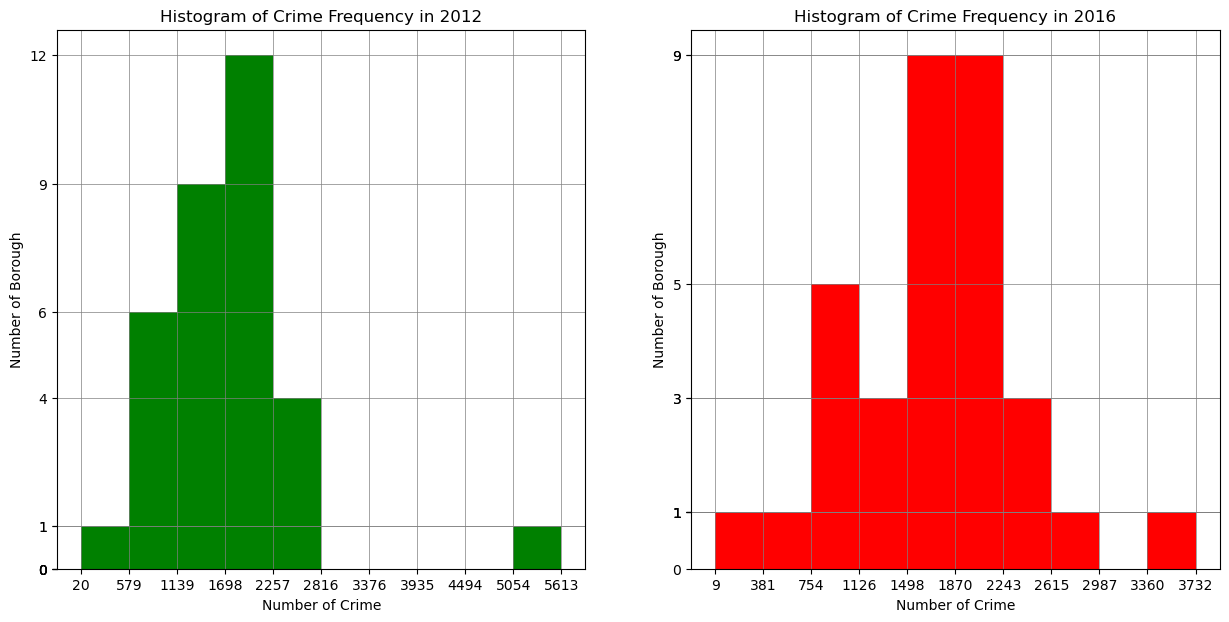

In [94]:
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(1,2,1) #1
ax1 = fig.add_subplot(1,2,2) #2

frequency12.plot(kind="hist", xticks=bin_edges12, yticks=count12, ax=ax0, legend=False, color="g")
ax0.set_title("Histogram of Crime Frequency in 2012")
ax0.grid(color="grey", linewidth=0.5)
ax0.set_xlabel("Number of Crime")
ax0.set_ylabel("Number of Borough")

frequency16.plot(kind="hist", xticks=bin_edges16, yticks=count16, ax=ax1, legend=False, color="r")
ax1.set_title("Histogram of Crime Frequency in 2016")
ax1.grid(color="grey", linewidth=0.5)
ax1.set_xlabel("Number of Crime")
ax1.set_ylabel("Number of Borough")

Distribusi frekuensi dengan frekuensi tertinggi di tahun 2012 menunjukkan terdapat 12 wilayah dengan jumlah kejahatan/kriminal sebesar 1698 sampai dengan 2257, sedangkan di tahun 2016 menunjukkan terdapat 9 wilayah dengan jumlah kejahatan/kriminal sebesar 1498 sampai dengan 2243. Secara grafis, distribusi frekuensi jumlah kejahatan/kriminal di tahun 2012 dan 2016 tidak jauh berbeda.

# Distribusi frekuensi jumlah kejahatan/kriminal di wilayah metropolitan London/borough tertentu ( Westminster, Southwark, dan Lambeth) di tahun 2008-2016

In [95]:
top3_crime = london_crime.drop(["lsoa_code","major_category","minor_category","month"], axis=1)
top3_crime = top3_crime.set_index("year").groupby("borough").sum()
top3_crime = top3_crime.sort_values(by="value", ascending=False).head(3)
top3_crime

value
borough           
Westminster  34072
Lambeth      22504
Southwark    21696

In [96]:
frequency_top3 = london_crime.drop(["lsoa_code","major_category","minor_category","month"],axis=1).set_index("borough")
frequency_top3 = frequency_top3.loc[top3_crime.index]
frequency_top3 = pd.pivot_table(frequency_top3, values="value", aggfunc=np.sum, index="year", columns="borough")
frequency_top3

borough  Barking and Dagenham  Barnet  Bexley  Brent  Bromley  Camden  \
year                                                                    
2008                        0       0       0      0        0       0   
2009                        0       0       0      0        0       0   
2010                        0       0       0      0        0       0   
2011                        0       0       0      0        0       0   
2012                        0       0       0      0        0       0   
2013                        0       0       0      0        0       0   
2014                        0       0       0      0        0       0   
2015                        0       0       0      0        0       0   
2016                        0       0       0      0        0       0   

borough  City of London  Croydon  Ealing  Enfield  ...  Merton  Newham  \
year                                               ...                   
2008                  0        0       0        0  ...       0       0   
2009                  0        0       0        0  ...       0       0   
2010                  0        0       0        0  ...       0       0   
2011                  0        0       0        0  ...       0       0   
2012                  0        0       0        0  ...       0       0   
2013                  0        0       0        0  ...       0       0   
2014                  0        0       0        0  ...       0       0   
2015                  0        0       0        0  ...       0       0   
2016                  0        0       0        0  ...       0       0   

borough  Redbridge  Richmond upon Thames  Southwark  Sutton  Tower Hamlets  \
year                                                                         
2008             0                     0       2700       0              0   
2009             0                     0       2320       0              0   
2010             0                     0       2414       0              0   
2011             0                     0       2431       0              0   
2012             0                     0       2373       0              0   
2013             0                     0       2571       0              0   
2014             0                     0       2040       0              0   
2015             0                     0       2378       0              0   
2016             0                     0       2469       0              0   

borough  Waltham Forest  Wandsworth  Westminster  
year                                              
2008                  0           0         3040  
2009                  0           0         3172  
2010                  0           0         2706  
2011                  0           0         3908  
2012                  0           0         5613  
2013                  0           0         4322  
2014                  0           0         3679  
2015                  0           0         3900  
2016                  0           0         3732  

[9 rows x 33 columns]

In [97]:
count, bin_edges = np.histogram(frequency_top3)
print(count)
count, bin_edges = np.histogram(frequency_top3)
print(count)
print(bin_edges)

[270   0   0   1  18   2   4   1   0   1]
[270   0   0   1  18   2   4   1   0   1]
[   0.   561.3 1122.6 1683.9 2245.2 2806.5 3367.8 3929.1 4490.4 5051.7
 5613. ]


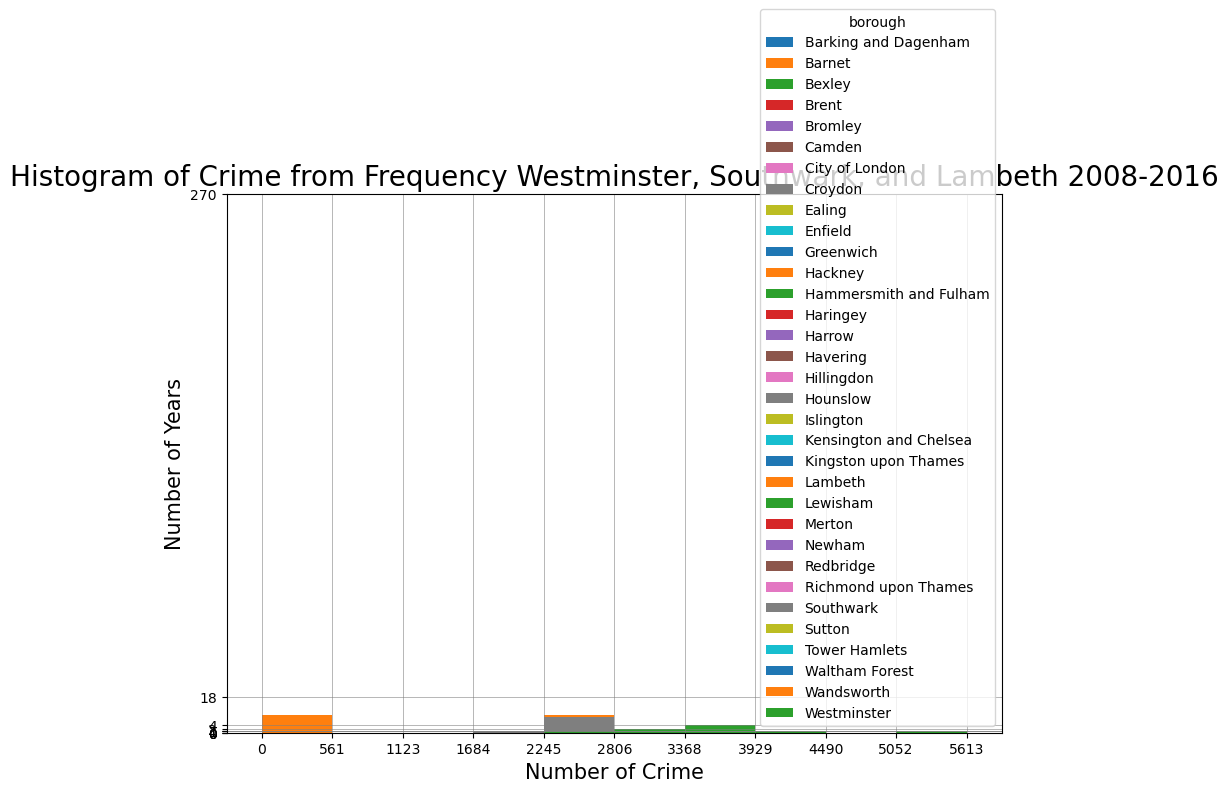

In [98]:
frequency_top3.plot(kind="hist",
                     figsize=(10,7),
                     xticks=bin_edges,
                     yticks=count)
plt.title("Histogram of Crime from Frequency Westminster, Southwark, and Lambeth 2008-2016", fontsize=20)
plt.xlabel("Number of Crime", fontsize=15)
plt.ylabel("Number of Years", fontsize=15)
plt.grid(color="grey", linewidth=0.4)
plt.show()

Diketahui bahwa distribusi frekuensi Lambeth dan Southwark memiliki distribusi frekuensi yang mirip, yaitu berkisar di 2040 sampai dengan 2755. Sedangkan untuk Westminster memiliki frekuensi tertinggi pada saat jumlah kejahatan/kriminalnya berkisar di 3469 sampai 4184.

# Distribusi frekuensi kategori kejahatan/kriminal tertentu (misal Burglary, Theft and Handling, dan Violance Against the Person) selama tahun 2008-2016

In [99]:
top3_major = london_crime.drop(["lsoa_code","borough","minor_category","month"], axis=1)
top3_major.set_index("year", inplace=True)
top3_major = top3_major.groupby("major_category").sum()
top3_major = top3_major.sort_values(by="value", ascending=False).head(3)
top3_major

value
major_category                     
Theft and Handling           204713
Violence Against the Person  121635
Burglary                      58754

In [100]:
major3_freq = london_crime.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
major3_freq = major3_freq.loc[top3_major.index]
major3_freq = pd.pivot_table(major3_freq, values="value", aggfunc=np.sum, index="year", columns="major_category")
major3_freq

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year                                                                 
2008                6892                0      0                 0   
2009                6929                0      0                 0   
2010                6794                0      0                 0   
2011                7392                0      0                 0   
2012                7147                0      0                 0   
2013                6912                0      0                 0   
2014                6006                0      0                 0   
2015                5475                0      0                 0   
2016                5207                0      0                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year                                                                  
2008                                    0        0                0   
2009                                    0        0                0   
2010                                    0        0                0   
2011                                    0        0                0   
2012                                    0        0                0   
2013                                    0        0                0   
2014                                    0        0                0   
2015                                    0        0                0   
2016                                    0        0                0   

major_category  Theft and Handling  Violence Against the Person  
year                                                             
2008                         21773                        12216  
2009                         21349                        12492  
2010                         21968                        12040  
2011                         23566                        11139  
2012                         26681                        11953  
2013                         23870                        11535  
2014                         20567                        14360  
2015                         22060                        17688  
2016                         22879                        18212

In [101]:
count, bin_edges = np.histogram(major3_freq)
print(count)
print(bin_edges)

[54  1  8  0  6  1  2  1  7  1]
[    0.   2668.1  5336.2  8004.3 10672.4 13340.5 16008.6 18676.7 21344.8
 24012.9 26681. ]


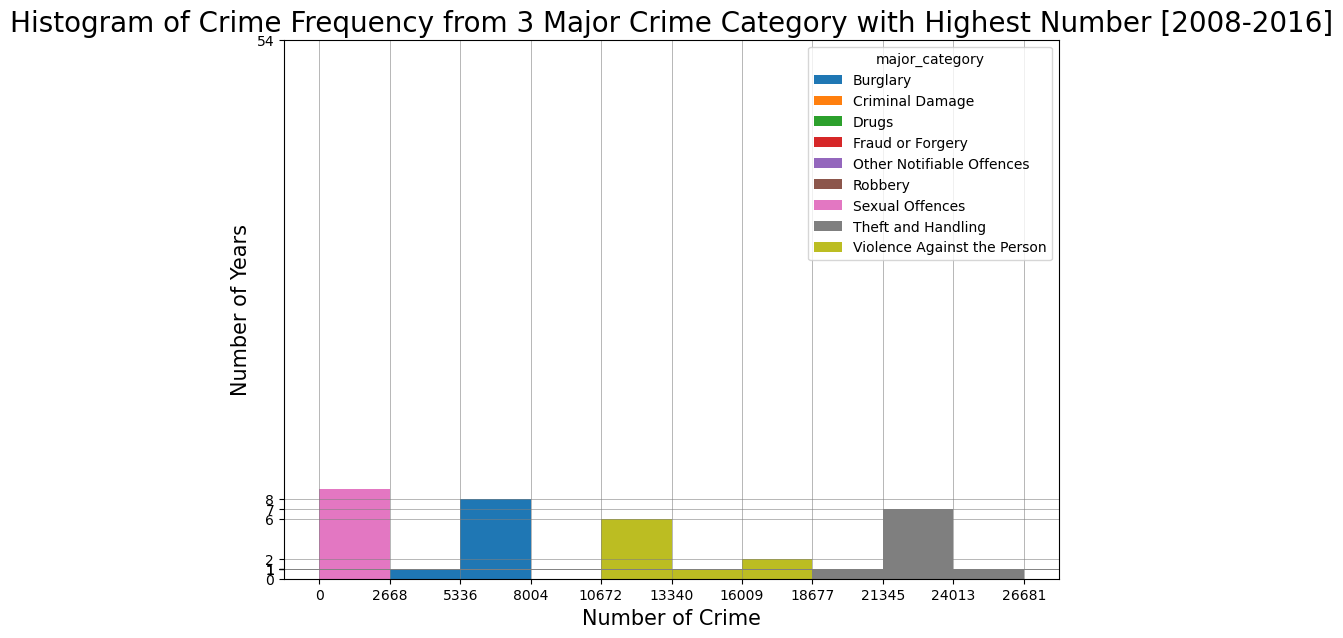

In [102]:
major3_freq.plot(kind="hist",
                     figsize=(10,7),
                     xticks=bin_edges,
                     yticks=count)
plt.title("Histogram of Crime Frequency from 3 Major Crime Category with Highest Number [2008-2016]", fontsize=20)
plt.xlabel("Number of Crime", fontsize=15)
plt.ylabel("Number of Years", fontsize=15)
plt.grid(color="grey", linewidth=0.4)
plt.show()

Kategori kejahatan/kriminal Bulgrary tertinggi dari tahun 2008-2016 yaitu di angka 5207 sampai 7354. Sedangkan frekuensi tertinggi kategori Violance Against the Person berkisar di angka 11649 sampai 13797 dan frekuensi tertinggi kategori Theft and Handling berkisar di angka 20239 sampai 22386

# Kesimpulan

1. Jumlah kasus kejahatan/kriminal di London tahun 2008-2016 memiliki frekuensi tahun tertinggi berkisar angka 700000 kasus. Artinya, berdasarkan distribusi ini, rata-rata jumlah kasus kejahatan/kriminal di London adalah 700000.
2. Jumlah kasus kejahatan/kriminal di London tahun 2008-2016 berdasarkan frekuensi tertinggi jumlah wilayahnya berkisar di angka 180000 sampai 220000. Artinya rata-rata jumlah kasus kejahatan/kriminal di masing-masing wilayah metropolitannya adalah 180000-220000.

In [103]:
# PIE CHART

crime_proportion = london_crime.drop(["borough","lsoa_code","minor_category","year","month"], axis=1)
crime_proportion = crime_proportion.groupby("major_category").size()
crime_proportion

major_category
Burglary                        81064
Criminal Damage                159997
Drugs                           92169
Fraud or Forgery                18521
Other Notifiable Offences       60400
Robbery                         72852
Sexual Offences                  8519
Theft and Handling             307992
Violence Against the Person    247061
dtype: int64

Output di atas adalah masing-masing proporsi kategori kejahatan/kriminal di London tahun 2008-2016

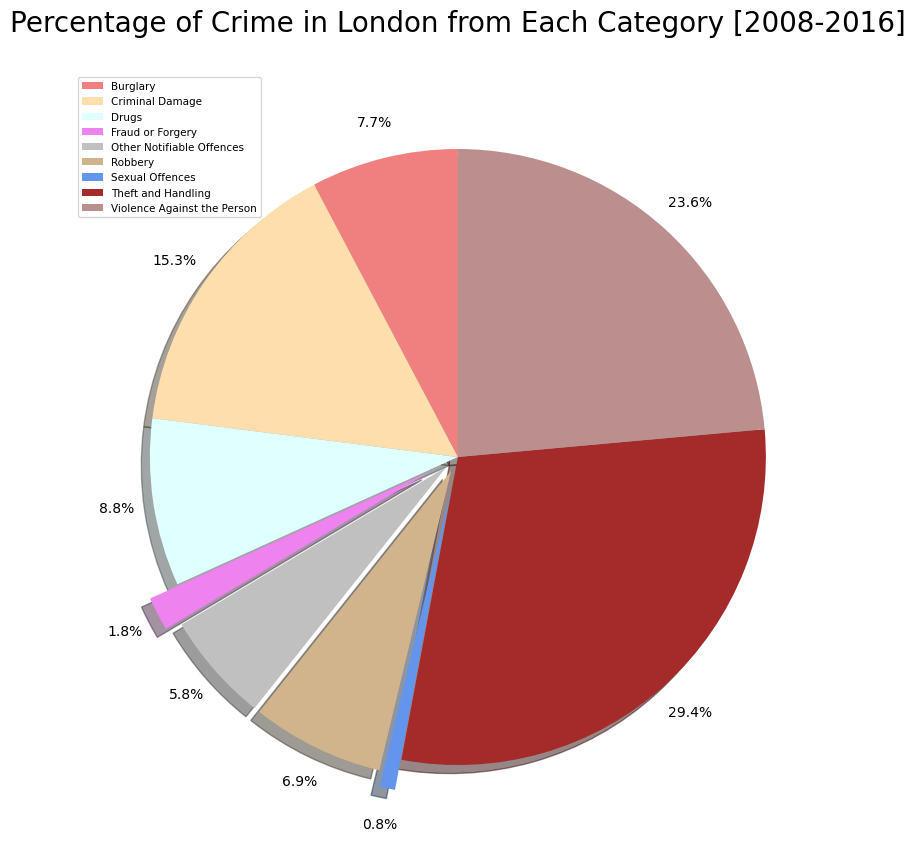

In [104]:
explode_list = [0,0,0,0.1,0.05,0.05,0.1,0,0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     explode = explode_list,
                     colors=color_list)
plt.title("Percentage of Crime in London from Each Category [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Berikut adalah proporsi kategori kejahatan/kriminal di London selama tahun 2008-2016 dalam satuan persen. Persentase tertinggi adalah kategori Theft and Handling yaitu sebesar 29.4% dan Violance Against the Person sebesar 23.6%. Sedangkan Sexual Offences dan Fraud or Forgery sebagai kategori dengan jumlah kasus terendah memiliki persentase sebesar 0.8% dan 1.8%.

#  Proporsi kategori kejahatan/kriminal di wilayah metropolis tertentu (misal Redbridge) dari tahun 2008-2016

In [105]:
redbridge_crime_proportion = london_crime.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
redbridge_crime_proportion = redbridge_crime_proportion.loc["Redbridge"]
redbridge_crime_proportion = redbridge_crime_proportion.groupby("major_category").size()
redbridge_crime_proportion

major_category
Burglary                        2682
Criminal Damage                 5291
Drugs                           2940
Fraud or Forgery                 660
Other Notifiable Offences       1954
Robbery                         2507
Sexual Offences                  214
Theft and Handling             10140
Violence Against the Person     8251
dtype: int64

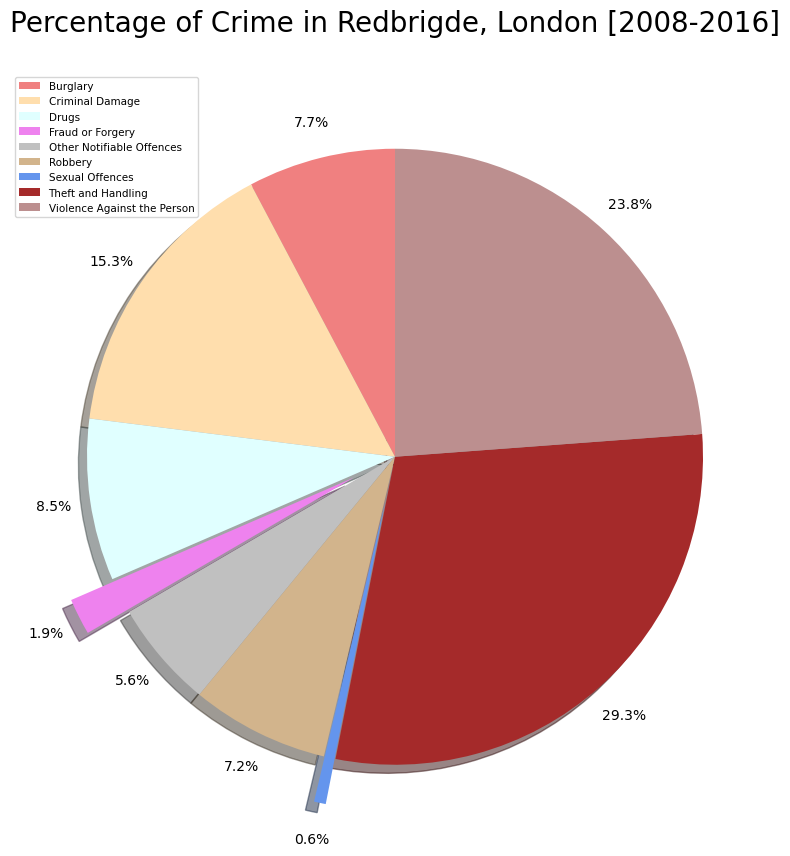

In [106]:
explode_list = [0,0,0,0.15,0,0,0.15,0,0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
redbridge_crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                    explode = explode_list,
                               subplots=True)
plt.title("Percentage of Crime in Redbrigde, London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=redbridge_crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Berdasarkan grafik di atas, diketahui bahwa persentase tertinggi kategori kejahatan/kriminal di Redbridge tahun 2008-2016 adalah Theft and Handling yaitu sebesar 29.3% dan persentase terendah adalah Sexual Offences 0.6%. Misal kita ingin mengetahui juga bagaimana proporsi kejahatan di wilayah City of London, yaitu sebagai berikut:


In [108]:
city_crime_proportion = london_crime.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
city_crime_proportion = city_crime_proportion.loc["City of London"]
city_crime_proportion = city_crime_proportion.groupby("major_category").size()
city_crime_proportion

major_category
Burglary                        48
Criminal Damage                 85
Drugs                           69
Fraud or Forgery                 0
Other Notifiable Offences       34
Robbery                         50
Sexual Offences                  0
Theft and Handling             254
Violence Against the Person    214
dtype: int64

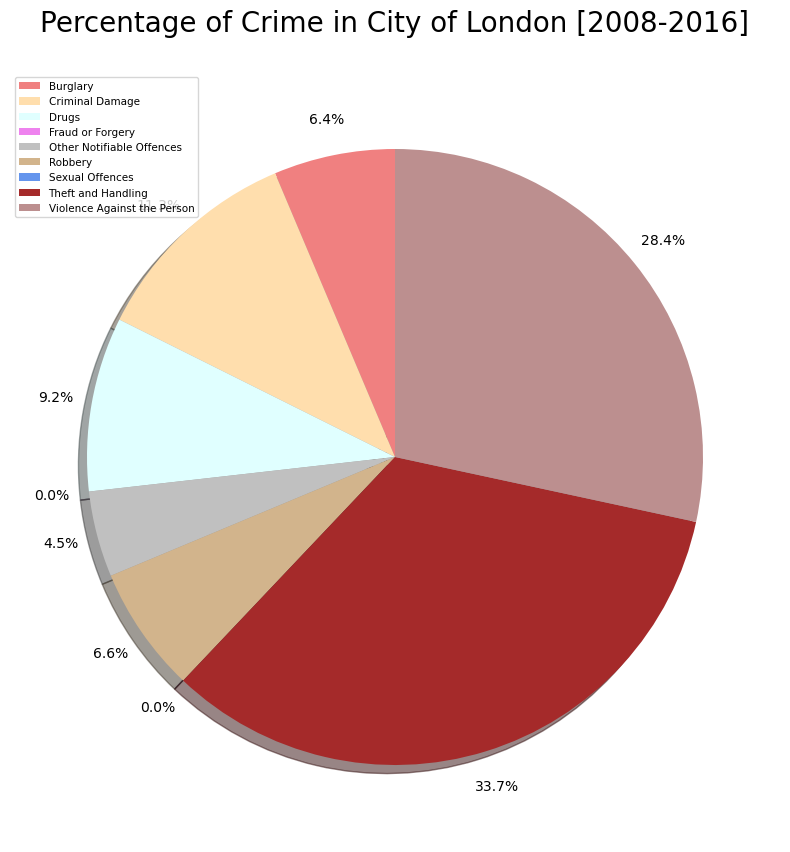

In [109]:
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
city_crime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                               subplots=True)
plt.title("Percentage of Crime in City of London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=city_crime_proportion.index, loc="upper left", prop={"size":7.5})
plt.show()

Diketahui bahwa di wilayah City of London tidak terdapat kasus Sexual Offences dan Fraud or Forgery sehingga tidak disertakan di Pie Chart. Selain itu, persentase kejahatan/kriminal di London yang tertinggi masih tetap Theft and Handling yaitu sebesar 33.7%. Dengan Pie Chart, kita dapat mengetahui proporsi atau persentase kategori kriminal/kejahatan di semua wilayah metropolitan London selama 2008-2016.

# Proporsi kategori kejahatan/kriminal di wilayah tertentu pada tahun tertentu (proporsi kategori kejahatan/kriminal di Sutton pada tahun 2010)

In [110]:
borough_crime_proportion = london_crime.drop(["lsoa_code","minor_category","month"], axis=1).set_index("year")
borough_crime_proportion = borough_crime_proportion.loc[2010]
borough_crime_proportion= pd.pivot_table(borough_crime_proportion, values="value", aggfunc=np.size, index="borough", columns="major_category")
borough_crime_proportion = borough_crime_proportion.loc["Sutton"].transpose()
borough_crime_proportion

major_category
Burglary                       227.0
Criminal Damage                440.0
Drugs                          221.0
Fraud or Forgery                19.0
Other Notifiable Offences      165.0
Robbery                        186.0
Sexual Offences                 16.0
Theft and Handling             857.0
Violence Against the Person    659.0
Name: Sutton, dtype: float64

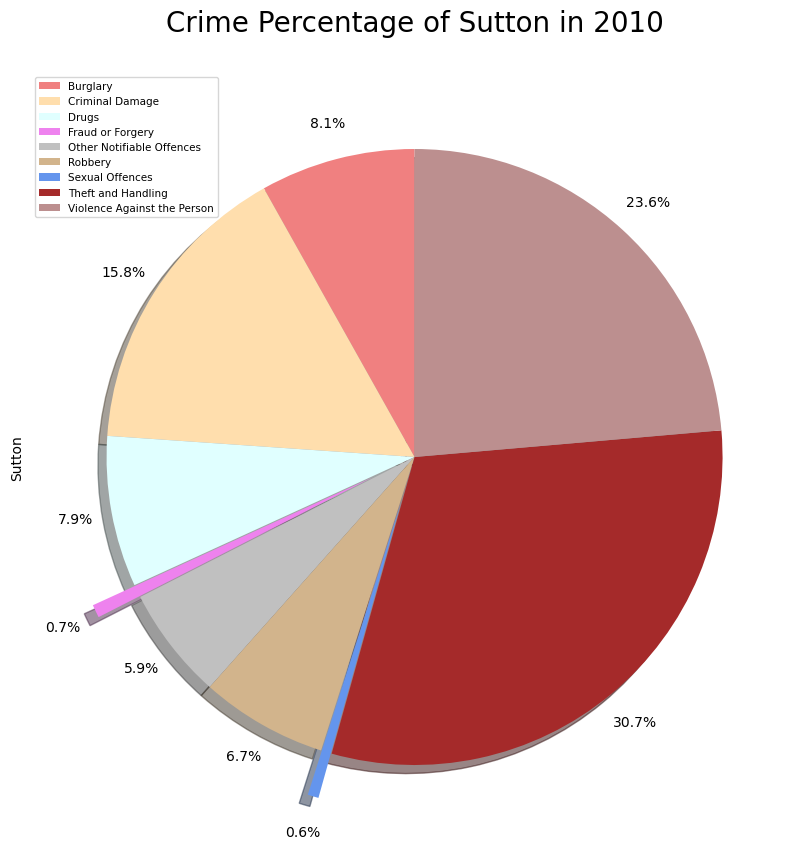

In [111]:
explode_list = [0, 0, 0, 0.15, 0, 0, 0.15, 0, 0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
borough_crime_proportion.plot(kind="pie",
                              figsize=(20, 10),
                              autopct="%1.1f%%",
                              startangle=90,
                              labels=None,
                              pctdistance=1.12,
                              explode=explode_list,
                              subplots=True,
                             shadow=True,
                             colors=color_list)
plt.title(
    "Crime Percentage of Sutton in 2010\n", fontsize=20, loc="center")
plt.legend(labels=borough_crime_proportion.index,
           loc="upper left", prop={"size": 7.5})
plt.show()

Diketahui bahwa Theft and Handling juga merupakan kategori kejahatan/kriminal yang paling tinggi di Sutton pada tahun 2010.

Selain dengan Bar Chart, kita juga dapat mengetahui informasi mengenai kategori kejahatan/kriminal di wilayah tertentu pada tahun tertentu, hanya berbeda bentuk representasinya, sehingga kita bisa menggunakan kedua visualisasi ini.

# Kesimpulan

Dengan menggunakan Pie Chart kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:

Theft and Handling memiliki proporsi tertinggi kategori kejahatan/kriminal di London dan Sexual Offences adalah proporsi terendah. Selain dengan Pie Chart, juga dapat dipastikan menggunakan Bar Chart untuk merepresentasikan jumlahnya.

# BOX PLOT
---

Box plot adalah salah satu grafik yang merepresentasikan distribusi data secara statistik melalui lima dimensi utama, yaitu:

Minimum : nilai terkecil dari data

Kuartil-1 : nilai tengah antara nilai minimum dan median

Median / Kuartil 2 : nilai tengah dari data

Kuartil-3 : nilai tengah antara nilai median dan maksimum

Maksimum : nilai tertinggi dari data

# Distribusi statistik dari data jumlah kasus kejahatan/kriminal di London tahun 2008-2016

In [114]:
# jumlah kasus kejahatan/kriminal di London dari tahun 2008-2016.
total_crime = london_crime.drop(["lsoa_code","borough","major_category","minor_category","month"], axis=1)
total_crime = total_crime.groupby("year").sum()
total_crime

value
year       
2008  56825
2009  54887
2010  54607
2011  55771
2012  57838
2013  53734
2014  51644
2015  55841
2016  57275

In [115]:
# Statistik deskriptif jumlah kasus kejahatan/kriminal di London dari tahun 2008-2016

total_crime.describe()

value
count      9.000000
mean   55380.222222
std     1923.337124
min    51644.000000
25%    54607.000000
50%    55771.000000
75%    56825.000000
max    57838.000000

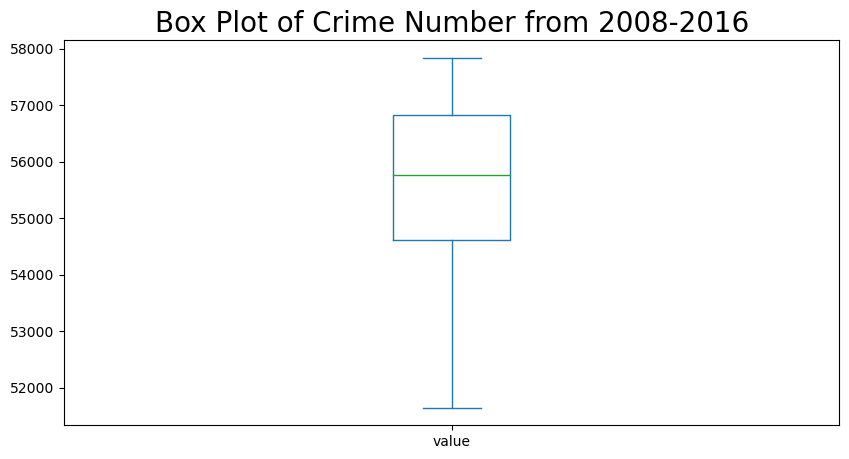

In [116]:
total_crime.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from 2008-2016", fontsize=20)
plt.show()

Berdasarkan plot di atas, diketahui bahwa nilai distribusi data jumlah kasus kejahatan/kriminal di London tidak terdapat outlier atau nilai yang lebih jauh lebih besar/kecil dari data yang lain. Jumlah kasus kejahatan/kriminal di London tertinggi adalah sekitar 52000, terendah sebesar 58000, dan nilai tengah di sekitar 55000.

# Distribusi statistik dari data jumlah kasus kejahatan/kriminal di masing-masing wilayah metropolitan tahun 2008-2016

In [117]:
# jumlah kasus kejahatan/kriminal di masing-masing wilayah metropolitan di London tahun 2008-2016.
crime_frequency = london_crime.drop(["lsoa_code","major_category","minor_category","month","year"], axis=1)
crime_frequency = crime_frequency.groupby("borough").sum()
crime_frequency

value
borough                      
Barking and Dagenham    11787
Barnet                  16350
Bexley                   8770
Brent                   17457
Bromley                 14353
Camden                  20829
City of London             64
Croydon                 20139
Ealing                  19555
Enfield                 15060
Greenwich               14210
Hackney                 16762
Hammersmith and Fulham  14330
Haringey                16825
Harrow                   9119
Havering                10886
Hillingdon              16115
Hounslow                14616
Islington               17821
Kensington and Chelsea  12925
Kingston upon Thames     6700
Lambeth                 22504
Lewisham                16627
Merton                   8636
Newham                  20591
Redbridge               14172
Richmond upon Thames     7283
Southwark               21696
Sutton                   7907
Tower Hamlets           17885
Waltham Forest          16164
Wandsworth              16212
Westminster             34072

In [119]:
# Distribusi Statistik  jumlah kasus kejahatan/kriminal di masing-masing wilayah metropolitan tahun 2008-2016
crime_frequency.describe()

value
count     33.000000
mean   15103.696970
std     6030.742442
min       64.000000
25%    11787.000000
50%    16115.000000
75%    17821.000000
max    34072.000000

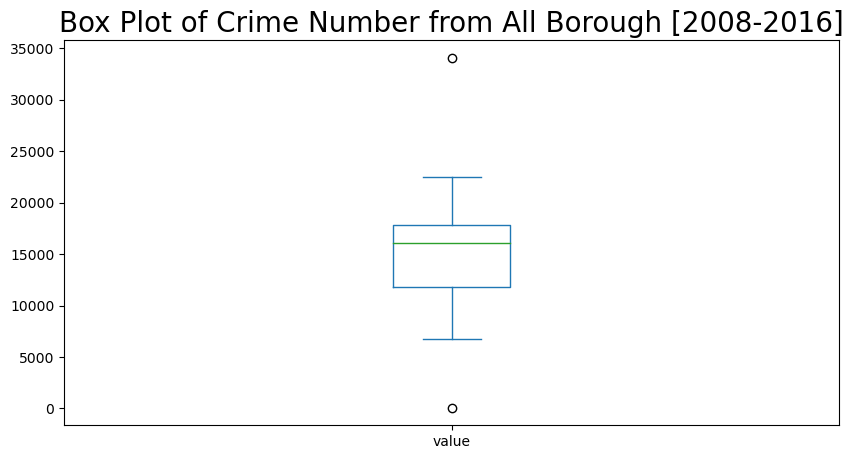

In [120]:
crime_frequency.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from All Borough [2008-2016]", fontsize=20)
plt.show()

Diketahui berdasarkan box plot di atas bahwa distribusi nilai statistik dari data jumlah kriminal/kejahatan di London terdapat dua titik outlier yang berarti terdapat dua wilayah yang jauh lebih besar/kecil dari data yang lain. Berdasarkan kesimpulan dari visualisasi lainnya, diketahui Westminster adalah wilayah yang jumlah kasus kejahatan/kriminalnya jauh lebih tinggi dan City of London adalah wilayah yang jumlah kasus kejahatan/kriminalnya jauh lebih rendah. Jumlah kasus kejahatan di semua wilayah di London memiliki nilai minimum di sekitar 5000 dan maksimum di sekitar 25000.

# Distribusi statistik dari data jumlah kasus kejahatan/kriminal berdasarkan kategorinya pada tahun 2008-2016

In [121]:
# kasus kejahatan/kriminal berdasarkan kategori mayornya tahun 2008-2016.
totalCrimeEachType = london_crime.drop(["lsoa_code","borough","minor_category","year","month"], axis=1).groupby("major_category").sum()
totalCrimeEachType["value"].to_numpy()
totalCrimeEachType

value
major_category                     
Burglary                      58754
Criminal Damage               48162
Drugs                         35881
Fraud or Forgery                489
Other Notifiable Offences      8272
Robbery                       20431
Sexual Offences                  85
Theft and Handling           204713
Violence Against the Person  121635

In [123]:
# nilai statistik dari jumlah kasus kejahatan/kriminal berdasarkan kategori mayornya. 
totalCrimeEachType.describe()

value
count       9.000000
mean    55380.222222
std     67680.240364
min        85.000000
25%      8272.000000
50%     35881.000000
75%     58754.000000
max    204713.000000

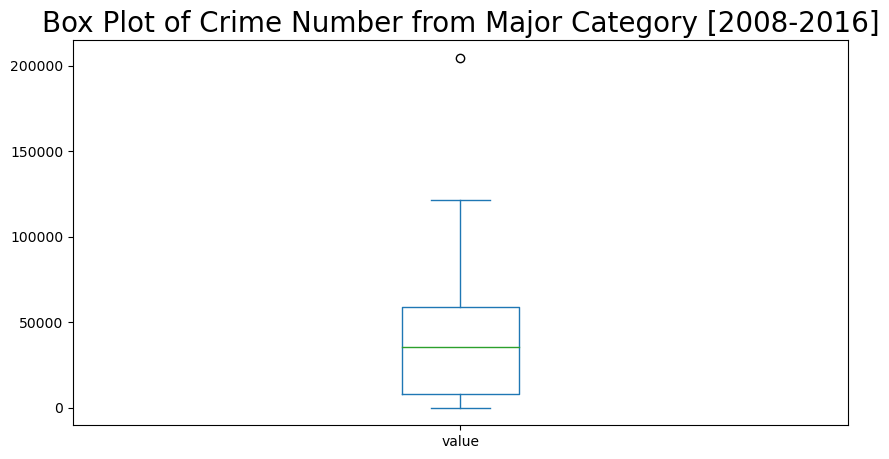

In [124]:
totalCrimeEachType.plot(kind="box",
                figsize=(10,5))
plt.title("Box Plot of Crime Number from Major Category [2008-2016]", fontsize=20)
plt.show()

Berdasarkan box plot di atas, diketahui bahwa jumlah kasus kriminal/kejahatan berdasarkan kategori mayor memiliki satu nilai outlier yang berarti terdapat kategori kejahatan/kriminal di mana jumlahnya jauh lebih besar dan dominan daripada kategori yang lain. Berdasarkan visualisasi sebelumnya, diketahui bahwa kategori Theft and Handling adalah kategori dengan jumlah kasus tertinggi. Data tersebar dengan nilai minimum sekitar 1000 dan maksimum di sekitar 1700000.

# Distribusi statistik dari data jumlah kasus kejahatan/kriminal di London setiap 4 tahun sekali

In [127]:
total_crime

value
year       
2008  56825
2009  54887
2010  54607
2011  55771
2012  57838
2013  53734
2014  51644
2015  55841
2016  57275

In [128]:
year08_12 = total_crime.loc[2008:2012]
year12_16 = total_crime.loc[2012:2016]

In [129]:
print(year08_12)
print(year12_16)

      value
year       
2008  56825
2009  54887
2010  54607
2011  55771
2012  57838
      value
year       
2012  57838
2013  53734
2014  51644
2015  55841
2016  57275


In [130]:
print(year08_12.describe())
print(year12_16.describe())

              value
count      5.000000
mean   55985.600000
std     1349.952888
min    54607.000000
25%    54887.000000
50%    55771.000000
75%    56825.000000
max    57838.000000
              value
count      5.000000
mean   55266.400000
std     2571.371093
min    51644.000000
25%    53734.000000
50%    55841.000000
75%    57275.000000
max    57838.000000


Text(0.5, 1.0, 'Box Plot of Crime Number from 2012-2016')

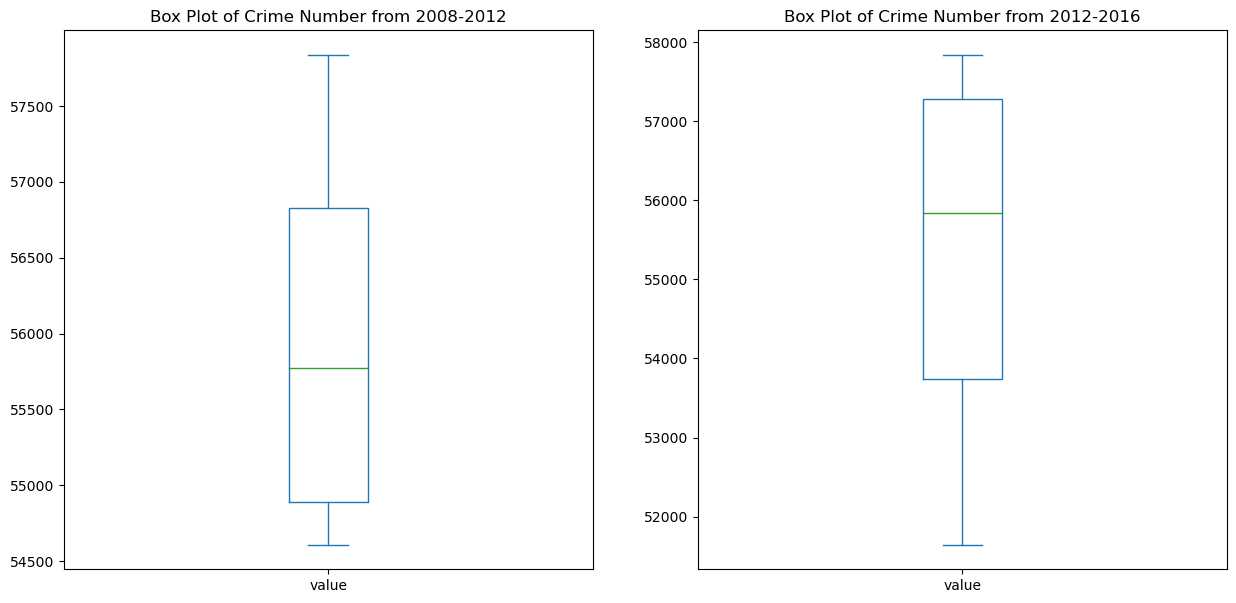

In [131]:
fig = plt.figure(figsize=(15,7))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

year08_12.plot(kind="box", ax=ax0)
ax0.set_title("Box Plot of Crime Number from 2008-2012")

year12_16.plot(kind="box", ax=ax1)
ax1.set_title("Box Plot of Crime Number from 2012-2016")

Berdasarkan kedua box plot di atas, diketahui bahwa jumlah kasus kejahatan/kriminal di tahun 2008-2012 dan 2012-2016 tidak jauh berbeda distribusi statistiknya. Tetapi, jumlah kasus di tahun 2008-2012 lebih tinggi dibanding jumlah kasus di tahun 2012-2016.

# Kesimpulan 

Dengan menggunakan Box Plot kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:

1. Jumlah kasus tertinggi kejahatan/kriminal di London dari tahun 2008-2016 adalah 740000 dan jumlah kasus terendah sebesar 680000.
2. Terdapat kategori kejahatan/kriminal yang terjadi dengan jumlah kasus jauh lebih tinggi dari kategori lainnya. Serta wilayah yang memiliki jumlah kasus yang jauh lebih tinggi dan jauh lebih rendah dari wilayah lainnya.
3. Jumlah kasus kejahatan/kriminal di tahun 2008-2012 lebih tinggi dibanding jumlah kasus kejahatan/kriminal di tahun 2012-2016 walaupun tidak jauh berbeda.

# SCATTER PLOT
---

# Jumlah kejahatan/kriminal tertinggi di London pada tahun 2008-2016

In [133]:
month_crime = london_crime.drop(["lsoa_code","borough","major_category","minor_category","year"], axis=1)
month_crime = month_crime.groupby("month").sum()
month_crime = month_crime.reset_index()
month_crime

month  value
0       1  40977
1       2  38329
2       3  42953
3       4  39887
4       5  42601
5       6  42559
6       7  43557
7       8  41884
8       9  40213
9      10  43265
10     11  41876
11     12  40321

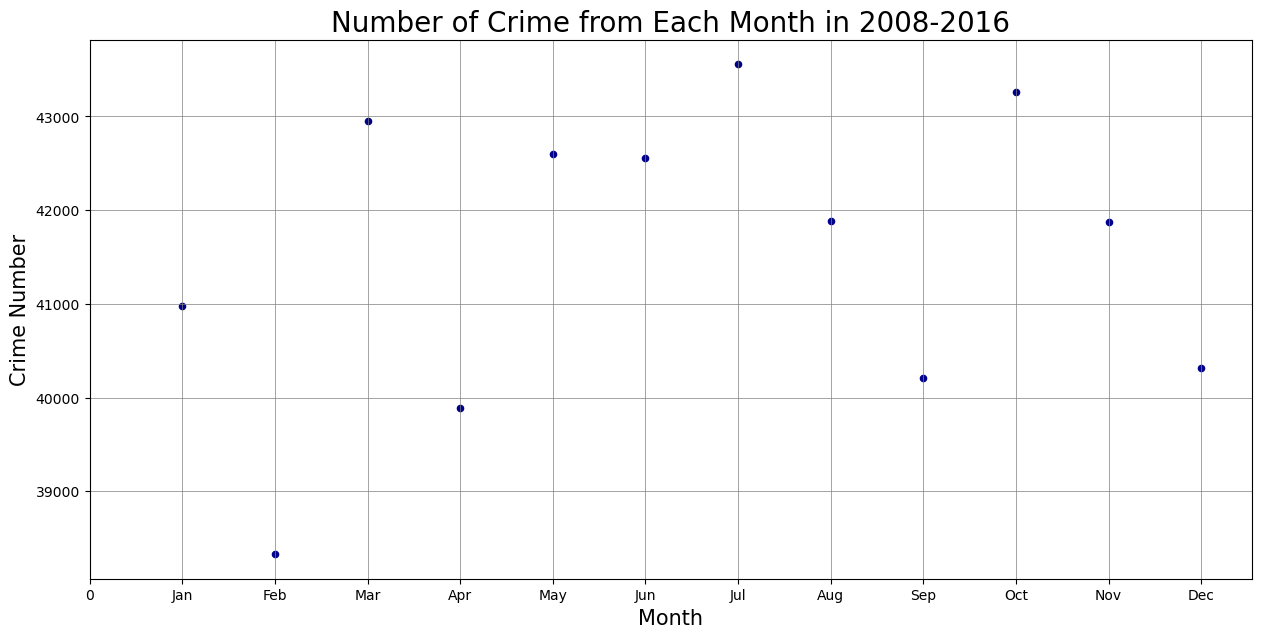

In [134]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime.plot(kind="scatter", x="month",y="value",figsize=(15,7), color="darkblue")
plt.title("Number of Crime from Each Month in 2008-2016", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Bulan yang sama selama tahun 2008-2016 dijumlahkan dan dihasilkan angka kasus kejahatan/kriminal di London yang paling tinggi adalah bulan Juli dan yang paling rendah adalah bulan Februari.

# Jumlah kejahatan/kriminal tertinggi di London pada tahun 2008

In [135]:
london_crime

lsoa_code               borough               major_category  \
0        E01001116               Croydon                     Burglary   
1        E01001646             Greenwich  Violence Against the Person   
2        E01000677               Bromley  Violence Against the Person   
3        E01003774             Redbridge                     Burglary   
4        E01004563            Wandsworth                      Robbery   
...            ...                   ...                          ...   
1048570  E01001649             Greenwich           Theft and Handling   
1048571  E01000464                Bexley              Criminal Damage   
1048572  E01000064  Barking and Dagenham                        Drugs   
1048573  E01004615            Wandsworth              Criminal Damage   
1048574  E01001752               Hackney    Other Notifiable Offences   

                      minor_category  value  year  month  
0        Burglary in Other Buildings      0  2016     11  
1                     Other violence      0  2016     11  
2                     Other violence      0  2015      5  
3        Burglary in Other Buildings      0  2016      3  
4                  Personal Property      0  2008      6  
...                              ...    ...   ...    ...  
1048570                  Other Theft      3  2010     11  
1048571  Criminal Damage To Dwelling      0  2012      3  
1048572          Possession Of Drugs      1  2010      2  
1048573        Other Criminal Damage      1  2016      7  
1048574             Other Notifiable      0  2008     12  

[1048575 rows x 7 columns]

In [136]:
month_crime2008 = london_crime.drop(["lsoa_code","borough","major_category","minor_category"], axis=1).set_index("year")
month_crime2008 = month_crime2008.loc[2008]
month_crime2008 = month_crime2008.reset_index().drop("year", axis=1)
month_crime2008 = month_crime2008.groupby("month").sum()
month_crime2008 = month_crime2008.reset_index()
month_crime2008

month  value
0       1   5211
1       2   4892
2       3   4435
3       4   4540
4       5   4739
5       6   4704
6       7   4741
7       8   4633
8       9   4611
9      10   5041
10     11   4633
11     12   4645

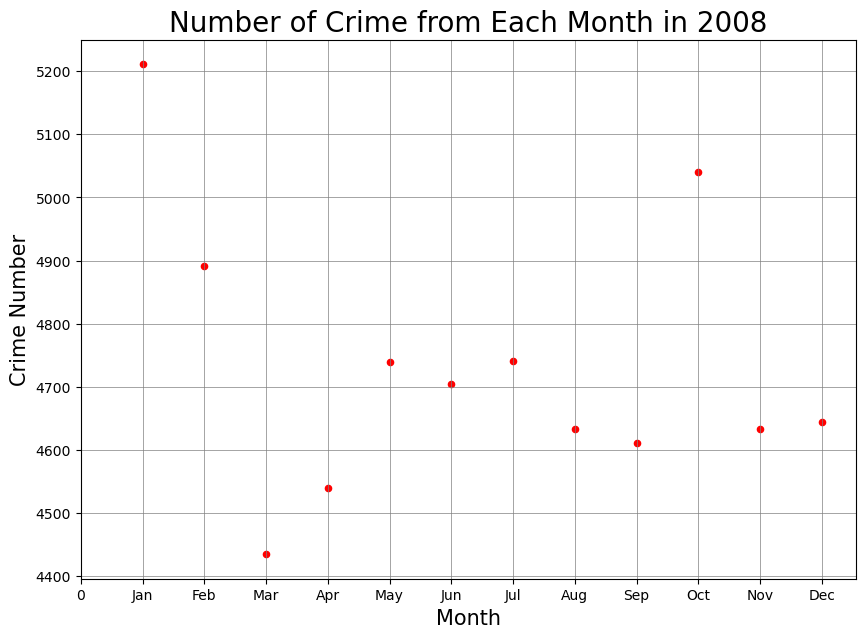

In [137]:
months = np.arange(len(month_crime["month"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime2008.plot(kind="scatter", x="month",y="value",figsize=(10,7), color="red")
plt.title("Number of Crime from Each Month in 2008", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Pada tahun 2008, jumlah kasus kejahatan/kriminal mencapai angka tertinggi di bulan Januari dan mencapai angka terendah di bulan Desember. Dengan scatterplot, kita bisa membandingkan jumlah kasus kejahatan/kriminal setiap bulannya di tahun-tahun tertentu.

# Kesimpulan

Dengan menggunakan Scatterplot kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:

Berdasarkan jumlah setiap bulannya selama tahun 2008-2016, bulan Juli adalah bulan yang memiliki jumlah kasus kejahatan/kriminal tertinggi dan bulan Februari memiliki jumlah kasus terendah. Sedangkan di 2008, bulan Januari adalah bulan yang memiliki jumlah kasus kejahatan/kriminal tertinggi dan bulan Desember memiliki jumlah kasus terendah. Jika divisualisasikan lebih lanjut, diduga terdapat perbedaan tren bulanan setiap tahunnya.

# Follium Maps
---

In [139]:
#Peta London
m = folium.Map(location=[51.507351, -0.127758], zoom_start=15)
m

In [140]:
df2 = london_crime[['borough','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
londonCrimeMap = folium.Map(location=[51.507351,-0.127758],zoom_start=10)

In [141]:
londonCrimeMap.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='Crime rate in boroughs of london')
display(londonCrimeMap)

C:\Users\ACER\anaconda3\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
